# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set(color_codes=True)
%matplotlib inline

---
## 2. Load data

In [2]:
df = pd.read_csv('clean_eda_data.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var  \
0                    0.131756                0.092638   
1                    0.147600                0.000000   
2                    0.167798                0.088409   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix  \
0                    0.036909                   42.497907   
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak  \
0               12.218665                    8.145777               42.629663   
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   

  mean_3m_price_peak  mean_3m_price_mid_peak  churn  
0          12.311304                8.182687      1  
1           0.000000                0.000000      0  
2           0.088409                0.000000      0  

[3 rows x 54 columns]

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [5]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [6]:
eda_data = pd.merge(df, diff, on='id')

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
eda_data.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  

In [9]:
eda_data.tail()

Unnamed: 0                                id  \
14600       14600  18463073fb097fc0ac5d3e040f356987   
14601       14601  d0a6f71671571ed83b2645d23af6de00   
14602       14602  10e6828ddd62cbcf687cb74928c4c2d2   
14603       14603  1cf20fd6206d7678d5bcafd28c53b4db   
14604       14604  563dde550fd624d7352f3de77c0cdfcd   

                          channel_sales  cons_12m  cons_gas_12m  \
14600  foosdfpfkusacimwkcsosbicdxkicaua     32270         47940   
14601  foosdfpfkusacimwkcsosbicdxkicaua      7223             0   
14602  foosdfpfkusacimwkcsosbicdxkicaua      1844             0   
14603  foosdfpfkusacimwkcsosbicdxkicaua       131             0   
14604                           MISSING      8730             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
14600                0 2012-05-24 2016-05-08      2015-05-08   2014-05-26   
14601              181 2012-08-27 2016-08-27      2012-08-27   2015-08-28   
14602              179 2012-02-08 2016-02-07      2012-02-08   2015-02-09   
14603                0 2012-08-30 2016-08-30      2012-08-30   2015-08-31   
14604                0 2009-12-18 2016-12-17      2009-12-18   2015-12-21   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
14600            4648.01                   0                       0.0   
14601             631.69                 181                       0.0   
14602             190.39                 179                       0.0   
14603              19.34                   0                       0.0   
14604             762.41                   0                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
14600                    18.57                        0.138305   
14601                   144.03                        0.100167   
14602                   129.60                        0.116900   
14603                     7.18                        0.145711   
14604                     1.07                        0.167086   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
14600                    0.000000                    44.311378       t   
14601                    0.091892                    58.995952       f   
14602                    0.100015                    40.606701       f   
14603                    0.000000                    44.311378       f   
14604                    0.088454                    45.311378       f   

       imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
14600      0.00                 27.88               27.88            2   
14601     15.94                  0.00                0.00            1   
14602     18.05                 39.84               39.84            1   
14603      0.00                 13.08               13.08            1   
14604      0.00                 11.84               11.84            1   

       net_margin  num_years_antig                         origin_up  pow_max  \
14600      381.77                4  lxidpiddsbxsbosboudacockeimpuepw   15.000   
14601       90.34                3  lxidpiddsbxsbosboudacockeimpuepw    6.000   
14602       20.38                4  lxidpiddsbxsbosboudacockeimpuepw   15.935   
14603        0.96                3  lxidpiddsbxsbosboudacockeimpuepw   11.000   
14604       96.34                6  ldkssxwpmemidmecebumciepifcamkci   10.392   

       mean_year_price_off_peak_var  mean_year_price_peak_var  \
14600                      0.144124                  0.000000   
14601                      0.106799                  0.095406   
14602                      0.124338                  0.103794   
14603                      0.149609                  0.007124   
14604                      0.168662                  0.087344   

       mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
14600                      0.000000                     44.370635   
14601                      0.070817                     59.015

In [10]:
eda_data.sample(10)

Unnamed: 0                                id  \
580           580  fc22251782e1359c310469d04e733123   
1550         1550  18aa801888beaee42918550f0b20a9fa   
9471         9471  18bfae0f560a2868c650664e236004b1   
8234         8234  6ad53d7d8e889ac5ab882d8b9ee31c64   
12259       12259  e3393a06de76953fe98f00a017d998f8   
12298       12298  3778d6ab40763ed13bb281bd32f77394   
7971         7971  757c8a6b6b929fc600429e63fe260297   
8790         8790  b78db6c875e6e933e6031a788a53059f   
10650       10650  3298a3ad1a97e50e6aa7f46dc02db8e6   
12575       12575  ebdfd787bb9d8140330bdfbe6185a442   

                          channel_sales  cons_12m  cons_gas_12m  \
580    usilxuppasemubllopkaafesmlibmsdf      3352             0   
1550   foosdfpfkusacimwkcsosbicdxkicaua      5736             0   
9471                            MISSING     24308             0   
8234                            MISSING     60046             0   
12259  lmkebamcaaclubfxadlmueccxoimlema      8391             0   
12298  foosdfpfkusacimwkcsosbicdxkicaua     74374         14889   
7971   ewpakwlliwisiwduibdlfmalxowmwpci     73386             0   
8790                            MISSING       923             0   
10650  foosdfpfkusacimwkcsosbicdxkicaua     11632             0   
12575  usilxuppasemubllopkaafesmlibmsdf      7212             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
580                  0 2011-05-10 2016-05-10      2011-05-10   2015-05-14   
1550              1033 2011-10-31 2016-10-31      2011-10-31   2015-11-01   
9471                 0 2010-01-11 2017-01-11      2010-01-11   2016-01-14   
8234                 0 2009-12-07 2016-12-07      2009-12-07   2015-12-08   
12259                0 2012-12-03 2016-12-02      2015-11-01   2015-12-03   
12298             7402 2012-06-04 2016-06-04      2013-11-05   2015-06-08   
7971             12121 2012-12-11 2016-12-12      2015-12-12   2014-12-31   
8790                 0 2011-09-01 2016-09-01      2015-07-10   2015-09-02   
10650                0 2009-07-17 2016-07-17      2009-07-17   2015-07-19   
12575              812 2012-02-20 2016-09-09      2014-09-09   2015-09-10   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
580               503.55                   0                       0.0   
1550              864.47                1033                       0.0   
9471              970.42                   0                       0.0   
8234              757.71                   0                       0.0   
12259            1266.87                   0                       0.0   
12298            7603.92                7402                       0.0   
7971             3695.50                5490                       0.0   
8790              108.88                   0                       0.0   
10650             367.34                   0                       0.0   
12575            1039.05                 812                      24.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
580                      15.81                        0.145711   
1550                     18.32                        0.147506   
9471                     16.13                        0.165794   
8234                    131.98                        0.115237   
12259                    18.32                        0.144039   
12298                   131.90                        0.114481   
7971                     16.26                        0.136536   
8790                     17.10                        0.162904   
10650                    15.97                        0.144902   
12575                    14.85                        0.210689   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
580                      0.000000                    44.311378       f   
1550                     0.000000                    45.806878       f   
9471                     0.087899                  

### Average price changes as time passes
By computing the average price changes over certain time periods rather than the entire year, we can now improve the feature that our colleague created.

In [11]:
# Aggregate average prices per period by company

mean_prices = price_df.groupby(['id']).agg({'price_off_peak_var': 'mean', 'price_peak_var': 'mean', 
                                            'price_mid_peak_var': 'mean', 'price_off_peak_fix': 'mean', 
                                            'price_peak_fix': 'mean', 'price_mid_peak_fix': 'mean'}).reset_index()

In [12]:
# Calculate the mean difference between consecutive periods

mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']
columns = ['id', 'off_peak_peak_var_mean_diff', 'peak_mid_peak_var_mean_diff', 'off_peak_mid_peak_var_mean_diff', 
           'off_peak_peak_fix_mean_diff', 'peak_mid_peak_fix_mean_diff', 'off_peak_mid_peak_fix_mean_diff']

In [13]:
eda_data = pd.merge(eda_data, mean_prices[columns], on='id')

In [14]:
eda_data.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  

In [15]:
eda_data.tail()

Unnamed: 0                                id  \
14600       14600  18463073fb097fc0ac5d3e040f356987   
14601       14601  d0a6f71671571ed83b2645d23af6de00   
14602       14602  10e6828ddd62cbcf687cb74928c4c2d2   
14603       14603  1cf20fd6206d7678d5bcafd28c53b4db   
14604       14604  563dde550fd624d7352f3de77c0cdfcd   

                          channel_sales  cons_12m  cons_gas_12m  \
14600  foosdfpfkusacimwkcsosbicdxkicaua     32270         47940   
14601  foosdfpfkusacimwkcsosbicdxkicaua      7223             0   
14602  foosdfpfkusacimwkcsosbicdxkicaua      1844             0   
14603  foosdfpfkusacimwkcsosbicdxkicaua       131             0   
14604                           MISSING      8730             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
14600                0 2012-05-24 2016-05-08      2015-05-08   2014-05-26   
14601              181 2012-08-27 2016-08-27      2012-08-27   2015-08-28   
14602              179 2012-02-08 2016-02-07      2012-02-08   2015-02-09   
14603                0 2012-08-30 2016-08-30      2012-08-30   2015-08-31   
14604                0 2009-12-18 2016-12-17      2009-12-18   2015-12-21   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
14600            4648.01                   0                       0.0   
14601             631.69                 181                       0.0   
14602             190.39                 179                       0.0   
14603              19.34                   0                       0.0   
14604             762.41                   0                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
14600                    18.57                        0.138305   
14601                   144.03                        0.100167   
14602                   129.60                        0.116900   
14603                     7.18                        0.145711   
14604                     1.07                        0.167086   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
14600                    0.000000                    44.311378       t   
14601                    0.091892                    58.995952       f   
14602                    0.100015                    40.606701       f   
14603                    0.000000                    44.311378       f   
14604                    0.088454                    45.311378       f   

       imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
14600      0.00                 27.88               27.88            2   
14601     15.94                  0.00                0.00            1   
14602     18.05                 39.84               39.84            1   
14603      0.00                 13.08               13.08            1   
14604      0.00                 11.84               11.84            1   

       net_margin  num_years_antig                         origin_up  pow_max  \
14600      381.77                4  lxidpiddsbxsbosboudacockeimpuepw   15.000   
14601       90.34                3  lxidpiddsbxsbosboudacockeimpuepw    6.000   
14602       20.38                4  lxidpiddsbxsbosboudacockeimpuepw   15.935   
14603        0.96                3  lxidpiddsbxsbosboudacockeimpuepw   11.000   
14604       96.34                6  ldkssxwpmemidmecebumciepifcamkci   10.392   

       mean_year_price_off_peak_var  mean_year_price_peak_var  \
14600                      0.144124                  0.000000   
14601                      0.106799                  0.095406   
14602                      0.124338                  0.103794   
14603                      0.149609                  0.007124   
14604                      0.168662                  0.087344   

       mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
14600                      0.000000                     44.370635   
14601                      0.070817                     59.015

In [16]:
eda_data.sample(10)

Unnamed: 0                                id  \
14284       14284  d47d25c8435bbac6405156859676432f   
9116         9116  1d167bda0c028fb064acae9935b5c527   
4467         4467  f6263999e4cbba21901abec2fe55d71d   
5868         5868  f33eee75e51674c83ef02144e932152a   
4712         4712  f40110044c584c6002f027f5808eacea   
809           809  bc36d3f47452c7071c07afe0e40d1e0c   
4310         4310  05f6bf6da2f79872643b200d5e29c458   
10862       10862  ed2025b309eb626eaca8cb4e4072b0e5   
3850         3850  e5bc1610cc8402c099a5f53b942e4675   
1109         1109  4ff6dd91c8e12e55fd858982c2a92c38   

                          channel_sales  cons_12m  cons_gas_12m  \
14284                           MISSING      2931             0   
9116                            MISSING      4107             0   
4467   ewpakwlliwisiwduibdlfmalxowmwpci     28627             0   
5868   lmkebamcaaclubfxadlmueccxoimlema   1001492        159816   
4712   foosdfpfkusacimwkcsosbicdxkicaua      9468             0   
809    foosdfpfkusacimwkcsosbicdxkicaua     39768             0   
4310   foosdfpfkusacimwkcsosbicdxkicaua     16027             0   
10862                           MISSING      1245             0   
3850   foosdfpfkusacimwkcsosbicdxkicaua      3303             0   
1109   lmkebamcaaclubfxadlmueccxoimlema   6207104         41532   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
14284                0 2009-08-28 2016-08-28      2009-08-28   2015-08-29   
9116                 0 2009-05-18 2016-05-18      2009-05-18   2015-05-23   
4467              3358 2012-04-27 2016-04-27      2012-04-27   2015-04-28   
5868            112397 2010-05-19 2016-05-19      2010-05-19   2015-05-20   
4712               901 2011-07-28 2016-07-28      2011-07-28   2015-07-29   
809               3401 2012-05-08 2016-05-08      2015-04-29   2015-05-15   
4310              1500 2012-05-19 2016-05-19      2012-05-19   2015-05-20   
10862               52 2009-11-04 2016-05-04      2009-11-04   2015-05-05   
3850                 0 2011-06-01 2016-06-01      2015-04-29   2015-06-14   
1109            558120 2011-02-21 2016-08-21      2011-02-21   2015-08-22   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
14284             435.80                   0                       0.0   
9116              610.77                   0                       0.0   
4467             4236.75                3358                       0.0   
5868              658.07                1161                       0.0   
4712             1217.40                 901                       0.0   
809              3895.43                3401                       0.0   
4310              448.75                 372                       0.0   
10862             156.73                  52                       0.0   
3850              493.85                   0                       0.0   
1109             1401.70                   0                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
14284                    18.90                        0.144902   
9116                      0.00                        0.144902   
4467                     15.98                        0.143166   
5868                     19.52                        0.144902   
4712                     16.32                        0.166950   
809                     129.73                        0.115182   
4310                    129.73                        0.116910   
10862                    17.13                        0.161165   
3850                     15.45                        0.144558   
1109                     13.76                        0.161165   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
14284                    0.000000                    44.311378       f   
9116                     0.000000                    44.311378       f   
4467                     0.000000                  

* This feature may be helpful because it enhances the already useful functionality that my colleague found by adding more granularity. We now have features that look at mean average price disparities across various time periods rather than differences over the course of a year (off_peak, peak, mid_peak). While inter-time-period features may reveal patterns on a micro scale between months, the Dec-Jan feature may indicate macro trends that happen over the course of an entire year.

### Max price changes across periods and months
Looking at the largest price variation between periods and months is another method we can improve the functionality from our colleague.

In [17]:
# Aggregate average prices per period by company

mean_prices_by_month = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                     'price_peak_var': 'mean', 
                                                                     'price_mid_peak_var': 'mean', 
                                                                     'price_off_peak_fix': 'mean', 
                                                                     'price_peak_fix': 'mean', 
                                                                     'price_mid_peak_fix': 'mean'}).reset_index()

In [18]:
# Calculate the mean difference between consecutive periods

mean_prices_by_month['off_peak_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_peak_var']
mean_prices_by_month['peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_mid_peak_var_mean_diff'] = mean_prices_by_month['price_off_peak_var'] - mean_prices_by_month['price_mid_peak_var']
mean_prices_by_month['off_peak_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_peak_fix']
mean_prices_by_month['peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']
mean_prices_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_prices_by_month['price_off_peak_fix'] - mean_prices_by_month['price_mid_peak_fix']

In [19]:
# Calculate the maximum monthly difference across time periods

max_diff_across_periods_months = mean_prices_by_month.groupby(['id']).agg({
    'off_peak_peak_var_mean_diff': 'max',
    'peak_mid_peak_var_mean_diff': 'max',
    'off_peak_mid_peak_var_mean_diff': 'max',
    'off_peak_peak_fix_mean_diff': 'max',
    'peak_mid_peak_fix_mean_diff': 'max',
    'off_peak_mid_peak_fix_mean_diff': 'max'
}).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)

In [20]:
columns = ['id', 'off_peak_peak_var_max_monthly_diff', 'peak_mid_peak_var_max_monthly_diff', 
           'off_peak_mid_peak_var_max_monthly_diff', 'off_peak_peak_fix_max_monthly_diff', 
           'peak_mid_peak_fix_max_monthly_diff', 'off_peak_mid_peak_fix_max_monthly_diff']

In [21]:
eda_data = pd.merge(eda_data, max_diff_across_periods_months[columns], on='id')

In [22]:
eda_data.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  forecast_cons_12m  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23               0.00   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31             189.95   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17              47.96   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31             240.04   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  

In [23]:
eda_data.tail()

Unnamed: 0                                id  \
14600       14600  18463073fb097fc0ac5d3e040f356987   
14601       14601  d0a6f71671571ed83b2645d23af6de00   
14602       14602  10e6828ddd62cbcf687cb74928c4c2d2   
14603       14603  1cf20fd6206d7678d5bcafd28c53b4db   
14604       14604  563dde550fd624d7352f3de77c0cdfcd   

                          channel_sales  cons_12m  cons_gas_12m  \
14600  foosdfpfkusacimwkcsosbicdxkicaua     32270         47940   
14601  foosdfpfkusacimwkcsosbicdxkicaua      7223             0   
14602  foosdfpfkusacimwkcsosbicdxkicaua      1844             0   
14603  foosdfpfkusacimwkcsosbicdxkicaua       131             0   
14604                           MISSING      8730             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
14600                0 2012-05-24 2016-05-08      2015-05-08   2014-05-26   
14601              181 2012-08-27 2016-08-27      2012-08-27   2015-08-28   
14602              179 2012-02-08 2016-02-07      2012-02-08   2015-02-09   
14603                0 2012-08-30 2016-08-30      2012-08-30   2015-08-31   
14604                0 2009-12-18 2016-12-17      2009-12-18   2015-12-21   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
14600            4648.01                   0                       0.0   
14601             631.69                 181                       0.0   
14602             190.39                 179                       0.0   
14603              19.34                   0                       0.0   
14604             762.41                   0                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
14600                    18.57                        0.138305   
14601                   144.03                        0.100167   
14602                   129.60                        0.116900   
14603                     7.18                        0.145711   
14604                     1.07                        0.167086   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
14600                    0.000000                    44.311378       t   
14601                    0.091892                    58.995952       f   
14602                    0.100015                    40.606701       f   
14603                    0.000000                    44.311378       f   
14604                    0.088454                    45.311378       f   

       imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
14600      0.00                 27.88               27.88            2   
14601     15.94                  0.00                0.00            1   
14602     18.05                 39.84               39.84            1   
14603      0.00                 13.08               13.08            1   
14604      0.00                 11.84               11.84            1   

       net_margin  num_years_antig                         origin_up  pow_max  \
14600      381.77                4  lxidpiddsbxsbosboudacockeimpuepw   15.000   
14601       90.34                3  lxidpiddsbxsbosboudacockeimpuepw    6.000   
14602       20.38                4  lxidpiddsbxsbosboudacockeimpuepw   15.935   
14603        0.96                3  lxidpiddsbxsbosboudacockeimpuepw   11.000   
14604       96.34                6  ldkssxwpmemidmecebumciepifcamkci   10.392   

       mean_year_price_off_peak_var  mean_year_price_peak_var  \
14600                      0.144124                  0.000000   
14601                      0.106799                  0.095406   
14602                      0.124338                  0.103794   
14603                      0.149609                  0.007124   
14604                      0.168662                  0.087344   

       mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
14600                      0.000000                     44.370635   
14601                      0.070817                     59.015

In [24]:
eda_data.sample(10)

Unnamed: 0                                id  \
11742       11742  2eca43c3c864f23e70edc6f1b5cef43c   
12055       12055  85f71420582955523bd769e8d8e1ebae   
8712         8712  9ac31d8112da79b8967bc827bb0d8449   
4434         4434  01cf6adaab6c04ff57fe28f94bd108a3   
11274       11274  d3c5b91243bcd71336494abd256f3ab9   
9122         9122  ff9748860e7bc4798846ddcffae1a7e6   
4861         4861  d40bc1e45db7f0154680cefdcfde11f0   
8892         8892  d40e5f89c3c5156f9ffb2f06d139dbf5   
8396         8396  4cd063b9565041594fa34a511bc905cc   
12212       12212  e68c8e251a087b59a09157f5e2d86e2a   

                          channel_sales  cons_12m  cons_gas_12m  \
11742  lmkebamcaaclubfxadlmueccxoimlema    765101             0   
12055  usilxuppasemubllopkaafesmlibmsdf      9357             0   
8712   usilxuppasemubllopkaafesmlibmsdf      3089          7162   
4434   foosdfpfkusacimwkcsosbicdxkicaua    155986             0   
11274                           MISSING      7166          9797   
9122                            MISSING     25621             0   
4861                            MISSING      9206             0   
8892   lmkebamcaaclubfxadlmueccxoimlema      5946             0   
8396   usilxuppasemubllopkaafesmlibmsdf     10815             0   
12212                           MISSING      2713             0   

       cons_last_month date_activ   date_end date_modif_prod date_renewal  \
11742            84889 2011-05-14 2016-05-13      2013-11-07   2015-05-18   
12055              792 2012-06-18 2016-06-18      2013-10-31   2015-06-23   
8712               255 2011-10-21 2016-11-04      2013-11-04   2015-11-05   
4434             12685 2012-05-22 2016-05-22      2015-04-29   2015-05-31   
11274              990 2009-08-01 2016-08-01      2009-08-01   2015-08-02   
9122              2689 2011-12-12 2016-12-12      2014-11-17   2015-12-14   
4861                 0 2010-12-23 2016-12-23      2015-11-01   2015-12-26   
8892                 0 2012-12-13 2016-09-19      2014-09-19   2015-09-20   
8396              3312 2012-07-27 2016-08-04      2015-06-21   2015-08-06   
12212                0 2010-08-04 2016-08-04      2010-08-04   2015-08-06   

       forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
11742            5654.24                   0                       0.0   
12055            1402.38                 792                       0.0   
8712              300.92                 255                       0.0   
4434             4122.88                3456                       0.0   
11274             736.72                 990                       0.0   
9122             2569.23                2689                       0.0   
4861             1369.50                   0                       0.0   
8892              858.23                   0                       0.0   
8396              987.38                3312                       0.0   
12212             407.06                   0                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
11742                    17.47                        0.142819   
12055                     9.71                        0.145711   
8712                    131.76                        0.115237   
4434                    142.45                        0.115182   
11274                   133.22                        0.115174   
9122                    131.80                        0.115237   
4861                     20.41                        0.145195   
8892                     19.79                        0.140621   
8396                     10.14                        0.161746   
12212                    15.97                        0.145711   

       forecast_price_energy_peak  forecast_price_pow_off_peak has_gas  \
11742                    0.000000                    44.311378       f   
12055                    0.000000                    44.311378       f   
8712                     0.100123                  

In [25]:
eda_data.drop('Unnamed: 0',axis=1, inplace=True)

In [26]:
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  0.000000   
3                     44.400265                  0.000000   
4                     40.6881

* In an effort to consider the viewpoint of a PowerCo client, I believed that calculating the maximum price change across months and time periods would be a useful feature to develop. Nothing irritates me more as a utility customer than unexpected price changes between months, and a significant price increase within a short period of time would prompt me to shop around for a better deal with other utilities providers. For this use case, we are attempting to predict churn, thus I thought it would be interesting to integrate this feature.

### BONUS - Feature Engineering
**Tenure**

* How long a company has been a client of PowerCo.

In [27]:
eda_data['tenure'] = ((eda_data['date_end'] - eda_data['date_activ'])/ np.timedelta64(1, 'Y')).astype(int)

In [28]:
eda_data.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

churn
tenure          
3       0.143836
2       0.133080
4       0.125756
13      0.095238
5       0.085425
12      0.083333
6       0.080713
7       0.073394
11      0.063584
8       0.048000
9       0.024096
10      0.020000

* As we can see, clients who have just been with us for four months or less are significantly more likely to leave than those who have been with us for longer. Intriguingly, compared to other variances between ordered tenure values, the difference between 4 and 5 months is around 4%, which signifies a significant increase in the risk that a client will leave. This may indicate that keeping a customer through the 4-month mark is actually a significant accomplishment in terms of retaining them as a long-term customer.

* This is an interesting feature to keep for modelling because clearly how long you've been a client, has a influence on the chance of a client churning.

#### Transforming dates into months

* months_activ = Number of months active until reference date (Jan 2016)
* months_to_end = Number of months of the contract left until reference date (Jan 2016)
* months_modif_prod = Number of months since last modification until reference date (Jan 2016)
* months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [29]:
def convert_months(reference_date, eda_data, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - eda_data[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [30]:
# Create reference date

reference_date = datetime(2016, 1, 1)

In [31]:
# Create columns

eda_data['months_activ'] = convert_months(reference_date, eda_data, 'date_activ')
eda_data['months_to_end'] = -convert_months(reference_date, eda_data, 'date_end')
eda_data['months_modif_prod'] = convert_months(reference_date, eda_data, 'date_modif_prod')
eda_data['months_renewal'] = convert_months(reference_date, eda_data, 'date_renewal')

**Insights :**
* Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.

* Using intuition, we could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of the months_activ feature.

* As well as this, if we think from the perspective of a client with PowerCo, if we are coming toward the end of our contract with PowerCo our thoughts could go a few ways. We could be looking for better deals for when our contract ends, or we might want to see out our contract and sign another one. One the other hand if we have only just joined, we may have a period where we are allowed to leave if we are not satisfied. Furthermore, if we are in the middle of our contract, their may be charges if we wanted to leave, deterring clients from churning mid-way through their agreement. So, I think months_to_end will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

* My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe this to be a positive sign, they are an engaged customer, and so I believe months_modif_prod will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

* Finally the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe months_renewal will be a good feature to include.

In [32]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them

remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
eda_data = eda_data.drop(columns=remove)

In [33]:
eda_data.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  mean_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                      0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                      0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                      0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                      0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  0.000000   
3                     44.400265                  0.000000   
4                     40.688156                 24.412893   

   mean_year_price_mid_peak_fix  mean_year_price_off_peak  \
0                     14.901340                 41.067053   
1                      0.000000                 44.460984   
2                      0.000000                 44.555962   
3                      0.000000                 44.551475   

### Transforming Boolean data
**has_gas**
* We simply want to transform this column from being categorical to being a binary flag

In [34]:
eda_data['has_gas'] = eda_data['has_gas'].replace(['t', 'f'], [1, 0])
eda_data.groupby(['has_gas']).agg({'churn': 'mean'})

churn
has_gas          
0        0.100544
1        0.081887

* If a consumer also purchases gas from PowerCo, it demonstrates that they are a brand-loyal customer who purchases various items. Therefore, it comes as no surprise that consumers who do not purchase gas are roughly 2% more likely to churn than those who do. Consequently, this function is helpful.

### Transforming Categorical Data
* A predictive model cannot accept categorical or string values, hence as a data scientist we need to encode categorical features into numerical representations in the most compact and discriminative way possible.

* The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present 0 < 1 < 2 < 3 ...

* Another way to encode categorical features is to use dummy variables also known as one hot encoding. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

### channel_sales

In [35]:
# Transform into categorical type

eda_data['channel_sales'] = eda_data['channel_sales'].astype('category')

In [36]:
# Let's see how many categories are within this column

print("\n ----- Value Counts of Channel Sales ----- \n")
eda_data['channel_sales'].value_counts()


 ----- Value Counts of Channel Sales ----- 



foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

* We have 8 categories, so we will create 8 dummy variables from this column. However, as we can see the last 3 categories in the output above, shows that they only have 11, 3 and 2 occurrences respectively. Since they're almost entirely a constant value and provide very little.

* For this reason, we will drop these 3 dummy variables.

In [37]:
eda_data = pd.get_dummies(eda_data, columns=['channel_sales'], prefix='channel')

In [38]:
eda_data = eda_data.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 
                                  'channel_epumfxlbckeskwekxbiuasklxalciiuu', 
                                  'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig                         origin_up  pow_max  \
0                3  lxidpiddsbxsbosboudacockeimpuepw   43.648   
1                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800   
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856   
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200   
4                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.124787                  0.100749   
1                      0.149609                  0.007124   
2                      0.170512                  0.088421   
3                      0.151210                  0.000000   
4                      0.124174                  0.103638   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.066530                     40.942265   
1                      0.000000                     44.311375   
2                      0.000000                     44.385450   
3                      0.000000                     44.400265   
4                      0.072865                     40.688156   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 22.352010                     14.901340   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.412893                     16.275263   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_mid_peak  \
0                 41.067053             22.452760                 14.967871   
1                 44.460984              0.007124                  0.000000   
2                 44.555962              0.088421                  0.000000   
3     

In [39]:
eda_data.tail()

id  cons_12m  cons_gas_12m  \
14600  18463073fb097fc0ac5d3e040f356987     32270         47940   
14601  d0a6f71671571ed83b2645d23af6de00      7223             0   
14602  10e6828ddd62cbcf687cb74928c4c2d2      1844             0   
14603  1cf20fd6206d7678d5bcafd28c53b4db       131             0   
14604  563dde550fd624d7352f3de77c0cdfcd      8730             0   

       cons_last_month  forecast_cons_12m  forecast_cons_year  \
14600                0            4648.01                   0   
14601              181             631.69                 181   
14602              179             190.39                 179   
14603                0              19.34                   0   
14604                0             762.41                   0   

       forecast_discount_energy  forecast_meter_rent_12m  \
14600                       0.0                    18.57   
14601                       0.0                   144.03   
14602                       0.0                   129.60   
14603                       0.0                     7.18   
14604                       0.0                     1.07   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
14600                        0.138305                    0.000000   
14601                        0.100167                    0.091892   
14602                        0.116900                    0.100015   
14603                        0.145711                    0.000000   
14604                        0.167086                    0.088454   

       forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
14600                    44.311378        1      0.00                 27.88   
14601                    58.995952        0     15.94                  0.00   
14602                    40.606701        0     18.05                 39.84   
14603                    44.311378        0      0.00                 13.08   
14604                    45.311378        0      0.00                 11.84   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
14600               27.88            2      381.77                4   
14601                0.00            1       90.34                3   
14602               39.84            1       20.38                4   
14603               13.08            1        0.96                3   
14604               11.84            1       96.34                6   

                              origin_up  pow_max  \
14600  lxidpiddsbxsbosboudacockeimpuepw   15.000   
14601  lxidpiddsbxsbosboudacockeimpuepw    6.000   
14602  lxidpiddsbxsbosboudacockeimpuepw   15.935   
14603  lxidpiddsbxsbosboudacockeimpuepw   11.000   
14604  ldkssxwpmemidmecebumciepifcamkci   10.392   

       mean_year_price_off_peak_var  mean_year_price_peak_var  \
14600                      0.144124                  0.000000   
14601                      0.106799                  0.095406   
14602                      0.124338                  0.103794   
14603                      0.149609                  0.007124   
14604                      0.168662                  0.087344   

       mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
14600                      0.000000                     44.370635   
14601                      0.070817                     59.015674   
14602                      0.073160                     40.701732   
14603                      0.000000                     44.311375   
14604                      0.000000                     44.266930   

       mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
14600                  0.000000                      0.000000   
14601                 36.393379                      8.345418   
14602                 24.421038                     16.280694   
14603                  0.000000                      0.000000   
14604                  0.000000                      0.000000   

       mean_year_price_off_peak  mean_year_price_peak  

In [40]:
eda_data.sample(10)

id  cons_12m  cons_gas_12m  \
4343   5db9507c25d48bde7a9e33613c4f1832      6883             0   
13985  3c156efe0c7eec5e3a6b757a81351537     43695             0   
8953   32ee837bb13f5301932f5b1bb5edee59     28491             0   
14294  384338f61e8d23ef8de411a53416ab04      4258             0   
8871   85ad93ce0d6bf985615ad44504ae7df9      7595             0   
9971   6b45eb78e7ab1690b09f6977346a7e0b     91275             0   
879    4d780e033cc5b34dd65a5704e0595629     23630             0   
6361   5bd39d3c149d751a0328a2c06672cd90      3011             0   
962    f290ad62dff0338f7414fad97efbfeb8   1532234             0   
9004   17804f8577f09c69f0a9687f5f35753d    111860        107685   

       cons_last_month  forecast_cons_12m  forecast_cons_year  \
4343               551             263.06                 185   
13985              220            4413.09                 220   
8953              2748            3105.97                2748   
14294              499             453.19                 499   
8871              2370             844.82                2370   
9971              8765            9493.70                8765   
879               2214             329.54                 314   
6361                 0             452.06                   0   
962             131412            1590.92                1790   
9004              9555            4410.68                2834   

       forecast_discount_energy  forecast_meter_rent_12m  \
4343                        0.0                   129.25   
13985                       0.0                     0.00   
8953                        0.0                   129.73   
14294                       0.0                   143.62   
8871                        0.0                    16.59   
9971                        0.0                   142.58   
879                         0.0                   144.02   
6361                        0.0                    19.38   
962                         0.0                    18.22   
9004                        0.0                   145.71   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
4343                         0.116509                    0.101397   
13985                        0.115182                    0.098841   
8953                         0.116900                    0.100015   
14294                        0.115237                    0.100123   
8871                         0.167086                    0.088444   
9971                         0.114658                    0.099545   
879                          0.115174                    0.098837   
6361                         0.138847                    0.000000   
962                          0.116910                    0.100572   
9004                         0.114782                    0.099665   

       forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
4343                     41.271364        1     17.90                 39.92   
13985                    40.606701        0     20.75                 29.52   
8953                     40.606701        0    289.54                 62.88   
14294                    41.105201        0     53.13                 49.44   
8871                     45.308378        0    268.87                 13.26   
9971                     40.606701        0    887.37                 94.92   
879                      40.606701        0     31.19                 30.78   
6361                     44.311378        0      0.00                  3.56   
962                      40.606701        0    184.79                 11.37   
9004                     40.606701        1    275.07                  0.64   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
4343                39.92            2       29.24                4   
13985               29.52            1      537.56                6   
8953                62.88            1      301.36                4   
14294   

### Transform into categorical type
**origin_up**

In [41]:
eda_data['origin_up'] = eda_data['origin_up'].astype('category')

In [42]:
# Let's see how many categories are within this column

print("\n ----- Value Counts of Origin Up ----- \n")
eda_data['origin_up'].value_counts()


 ----- Value Counts of Origin Up ----- 



lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

* Similar to channel_sales the last 3 categories in the output above show very low frequency, so we will remove these from the features after creating dummy variables.

In [43]:
eda_data = pd.get_dummies(eda_data, columns=['origin_up'], prefix='origin_up')

In [44]:
eda_data = eda_data.drop(columns=['origin_up_MISSING', 
                      'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 
                      'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])

In [45]:
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig  pow_max  mean_year_price_off_peak_var  \
0                3   43.648                      0.124787   
1                6   13.800                      0.149609   
2                6   13.856                      0.170512   
3                6   13.200                      0.151210   
4                6   19.800                      0.124174   

   mean_year_price_peak_var  mean_year_price_mid_peak_var  \
0                  0.100749                      0.066530   
1                  0.007124                      0.000000   
2                  0.088421                      0.000000   
3                  0.000000                      0.000000   
4                  0.103638                      0.072865   

   mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
0                     40.942265                 22.352010   
1                     44.311375                  0.000000   
2                     44.385450                  0.000000   
3                     44.400265                  0.000000   
4                     40.688156                 24.412893   

   mean_year_price_mid_peak_fix  mean_year_price_off_peak  \
0                     14.901340                 41.067053   
1                      0.000000                 44.460984   
2                      0.000000                 44.555962   
3                      0.000000                 44.551475   
4                     16.275263                 40.812330   

   mean_year_price_peak  mean_year_price_mid_peak  mean_6m_price_off_peak_var  \
0             22.452760                 14.967871                    0.123598   
1              0.007124                  0.000000                    0.147851   
2              0.088421                  0.000000                    0.168569   
3              0.000000                  0.000

In [46]:
eda_data.tail()

id  cons_12m  cons_gas_12m  \
14600  18463073fb097fc0ac5d3e040f356987     32270         47940   
14601  d0a6f71671571ed83b2645d23af6de00      7223             0   
14602  10e6828ddd62cbcf687cb74928c4c2d2      1844             0   
14603  1cf20fd6206d7678d5bcafd28c53b4db       131             0   
14604  563dde550fd624d7352f3de77c0cdfcd      8730             0   

       cons_last_month  forecast_cons_12m  forecast_cons_year  \
14600                0            4648.01                   0   
14601              181             631.69                 181   
14602              179             190.39                 179   
14603                0              19.34                   0   
14604                0             762.41                   0   

       forecast_discount_energy  forecast_meter_rent_12m  \
14600                       0.0                    18.57   
14601                       0.0                   144.03   
14602                       0.0                   129.60   
14603                       0.0                     7.18   
14604                       0.0                     1.07   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
14600                        0.138305                    0.000000   
14601                        0.100167                    0.091892   
14602                        0.116900                    0.100015   
14603                        0.145711                    0.000000   
14604                        0.167086                    0.088454   

       forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
14600                    44.311378        1      0.00                 27.88   
14601                    58.995952        0     15.94                  0.00   
14602                    40.606701        0     18.05                 39.84   
14603                    44.311378        0      0.00                 13.08   
14604                    45.311378        0      0.00                 11.84   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
14600               27.88            2      381.77                4   15.000   
14601                0.00            1       90.34                3    6.000   
14602               39.84            1       20.38                4   15.935   
14603               13.08            1        0.96                3   11.000   
14604               11.84            1       96.34                6   10.392   

       mean_year_price_off_peak_var  mean_year_price_peak_var  \
14600                      0.144124                  0.000000   
14601                      0.106799                  0.095406   
14602                      0.124338                  0.103794   
14603                      0.149609                  0.007124   
14604                      0.168662                  0.087344   

       mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
14600                      0.000000                     44.370635   
14601                      0.070817                     59.015674   
14602                      0.073160                     40.701732   
14603                      0.000000                     44.311375   
14604                      0.000000                     44.266930   

       mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
14600                  0.000000                      0.000000   
14601                 36.393379                      8.345418   
14602                 24.421038                     16.280694   
14603                  0.000000                      0.000000   
14604                  0.000000                      0.000000   

       mean_year_price_off_peak  mean_year_price_peak  \
14600                 44.514760              0.000000   
14601                 59.122473             36.488785   
14602                 40.826071             24.524832   
14603                 44.460984              0.007124   
14604                 44.4355

In [47]:
eda_data.sample(10)

id  cons_12m  cons_gas_12m  \
1690   6cc3ee33510248bf292948e55f31f309     10036             0   
2644   c4a0edfd0a91512fc9dcaa8b6e7faee5    457677        940292   
12728  bb9e0fc23fb97edf9f8a63294eb39e51      9445             0   
5918   bd7880c16f8f751bde474a550c9b8398      6876             0   
9022   58a72330c790add6a8a8ddd8dd073017      6228             0   
8762   648a76bb93bcf7dca7e243619e25eab8      5629             0   
8438   2ad145eae75864e297bf8310102ee5c2    964043             0   
11474  d8282cc85c3866b0b330356e63ef28fd     13524          7297   
1368   09719f81116327c767d33ffeb7a485da      1895             0   
11279  806ca4d1c0eb769257096f164567ff53     10992             0   

       cons_last_month  forecast_cons_12m  forecast_cons_year  \
1690              1078            1003.07                1078   
2644             21826               0.00                   0   
12728                0             889.47                   0   
5918              1535             710.45                1535   
9022                 0             283.89                   0   
8762                 0             844.15                   0   
8438             65969            3229.51                3158   
11474              303            1763.56                   0   
1368                 0             284.47                   0   
11279                0            1149.19                   0   

       forecast_discount_energy  forecast_meter_rent_12m  \
1690                        0.0                   129.04   
2644                        0.0                    31.57   
12728                       0.0                    16.45   
5918                        0.0                   151.87   
9022                       30.0                    17.20   
8762                        0.0                    12.56   
8438                        0.0                    16.45   
11474                       0.0                    16.36   
1368                        0.0                    15.20   
11279                       0.0                   120.47   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
1690                         0.115237                    0.100123   
2644                         0.167095                    0.088463   
12728                        0.161743                    0.083849   
5918                         0.116900                    0.100015   
9022                         0.198096                    0.000000   
8762                         0.146348                    0.000000   
8438                         0.164058                    0.086163   
11474                        0.145789                    0.000000   
1368                         0.145711                    0.000000   
11279                        0.115237                    0.100123   

       forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
1690                     40.939027        0    107.31                 17.66   
2644                     46.311378        1      0.00                 27.38   
12728                    44.311378        0      0.00                 25.56   
5918                     40.606701        0    156.22                 60.60   
9022                     46.305378        0      0.00                 26.54   
8762                     45.806878        0      0.00                 17.13   
8438                     44.311378        0    351.90                 25.92   
11474                    44.311378        1      0.00                  7.68   
1368                     44.311378        0      0.00                 12.30   
11279                    40.606701        0      0.00                  9.84   

       margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
1690                17.66            1      117.31                5   16.000   
2644                27.38            2        0.00                6   13.856   
12728               25.56            1       78.74  

### Transforming numerical data
* In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewness is because some predictive models have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called parametric models, and they typically assume that all variables are both independent and normally distributed.

* Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

* There are many ways that we can treat skewed variables. We can apply transformations such as:

Square root
Cubic root
Logarithm
to a continuous numeric column and we will notice the distribution changes. For this use case we will use the 'Logarithm' transformation for the positively skewed features.

**Note:** We cannot apply log to a value of 0, so we will add a constant of 1 to all the values

* First I want to see the statistics of the skewed features, so that we can compare before and after transformation.

In [48]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

In [49]:
print("\n ----- Statistical Summary of Skewed ----- \n")
eda_data[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



count           mean            std  min  \
cons_12m                        14605.0  159230.267032  573483.629064  0.0   
cons_gas_12m                    14605.0   28091.082506  162978.563803  0.0   
cons_last_month                 14605.0   16091.371448   64366.262314  0.0   
forecast_cons_12m               14605.0    1868.638618    2387.651549  0.0   
forecast_cons_year              14605.0    1399.858747    3247.876793  0.0   
forecast_discount_energy        14605.0       0.966450       5.108355  0.0   
forecast_meter_rent_12m         14605.0      63.090448      66.166636  0.0   
forecast_price_energy_off_peak  14605.0       0.137282       0.024623  0.0   
forecast_price_energy_peak      14605.0       0.050488       0.049037  0.0   
forecast_price_pow_off_peak     14605.0      43.130085       4.486140  0.0   

                                        25%           50%           75%  \
cons_12m                        5674.000000  14116.000000  40764.000000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    793.000000   3383.000000   
forecast_cons_12m                494.980000   1112.610000   2402.270000   
forecast_cons_year                 0.000000    314.000000   1746.000000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.800000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01

* We can see that the standard deviation for most of these features is quite high.

### Applying log10 transformation

In [50]:
eda_data["cons_12m"] = np.log10(eda_data["cons_12m"] + 1)
eda_data["cons_gas_12m"] = np.log10(eda_data["cons_gas_12m"] + 1)
eda_data["cons_last_month"] = np.log10(eda_data["cons_last_month"] + 1)
eda_data["forecast_cons_12m"] = np.log10(eda_data["forecast_cons_12m"] + 1)
eda_data["forecast_cons_year"] = np.log10(eda_data["forecast_cons_year"] + 1)
eda_data["forecast_meter_rent_12m"] = np.log10(eda_data["forecast_meter_rent_12m"] + 1)
eda_data["imp_cons"] = np.log10(eda_data["imp_cons"] + 1)

**Again Checking the statistics of the skewed features**

In [51]:
print("\n ----- Statistical Summary of Skewed ----- \n")
eda_data[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



count       mean       std  min        25%  \
cons_12m                        14605.0   4.223945  0.884545  0.0   3.753966   
cons_gas_12m                    14605.0   0.778978  1.716828  0.0   0.000000   
cons_last_month                 14605.0   2.264801  1.769266  0.0   0.000000   
forecast_cons_12m               14605.0   2.962162  0.683612  0.0   2.695464   
forecast_cons_year              14605.0   1.784733  1.584972  0.0   0.000000   
forecast_discount_energy        14605.0   0.966450  5.108355  0.0   0.000000   
forecast_meter_rent_12m         14605.0   1.517233  0.571489  0.0   1.235023   
forecast_price_energy_off_peak  14605.0   0.137282  0.024623  0.0   0.116340   
forecast_price_energy_peak      14605.0   0.050488  0.049037  0.0   0.000000   
forecast_price_pow_off_peak     14605.0  43.130085  4.486140  0.0  40.606701   

                                      50%        75%        max  
cons_12m                         4.149742   4.610287   6.792889  
cons_gas_12m                     0.000000   0.000000   6.618528  
cons_last_month                  2.899821   3.529430   5.887169  
forecast_cons_12m                3.046733   3.380803   4.918575  
forecast_cons_year               2.498311   3.242293   5.243970  
forecast_discount_energy         0.000000   0.000000  30.000000  
forecast_meter_rent_12m          1.296665   2.120673   2.778376  
forecast_price_energy_off_peak   0.143166   0.146348   0.273963  
forecast_price_energy_peak       0.084138   0.098837   0.195975  
forecast_price_pow_off_peak     44.311378  44.311378  59.266378

* Now we can see that for the majority of the features, their standard deviation is much lower after transformation. This is a good thing, it shows that these features are more stable and predictable now.

**Let's quickly check the distributions of some of these features too.**

C:\Users\Hritika Vaishnav\AppData\Local\Temp\ipykernel_17272\3428649338.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((eda_data["cons_12m"].dropna()), ax=axs[0], color='g')
C:\Users\Hritika Vaishnav\AppData\Local\Temp\ipykernel_17272\3428649338.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

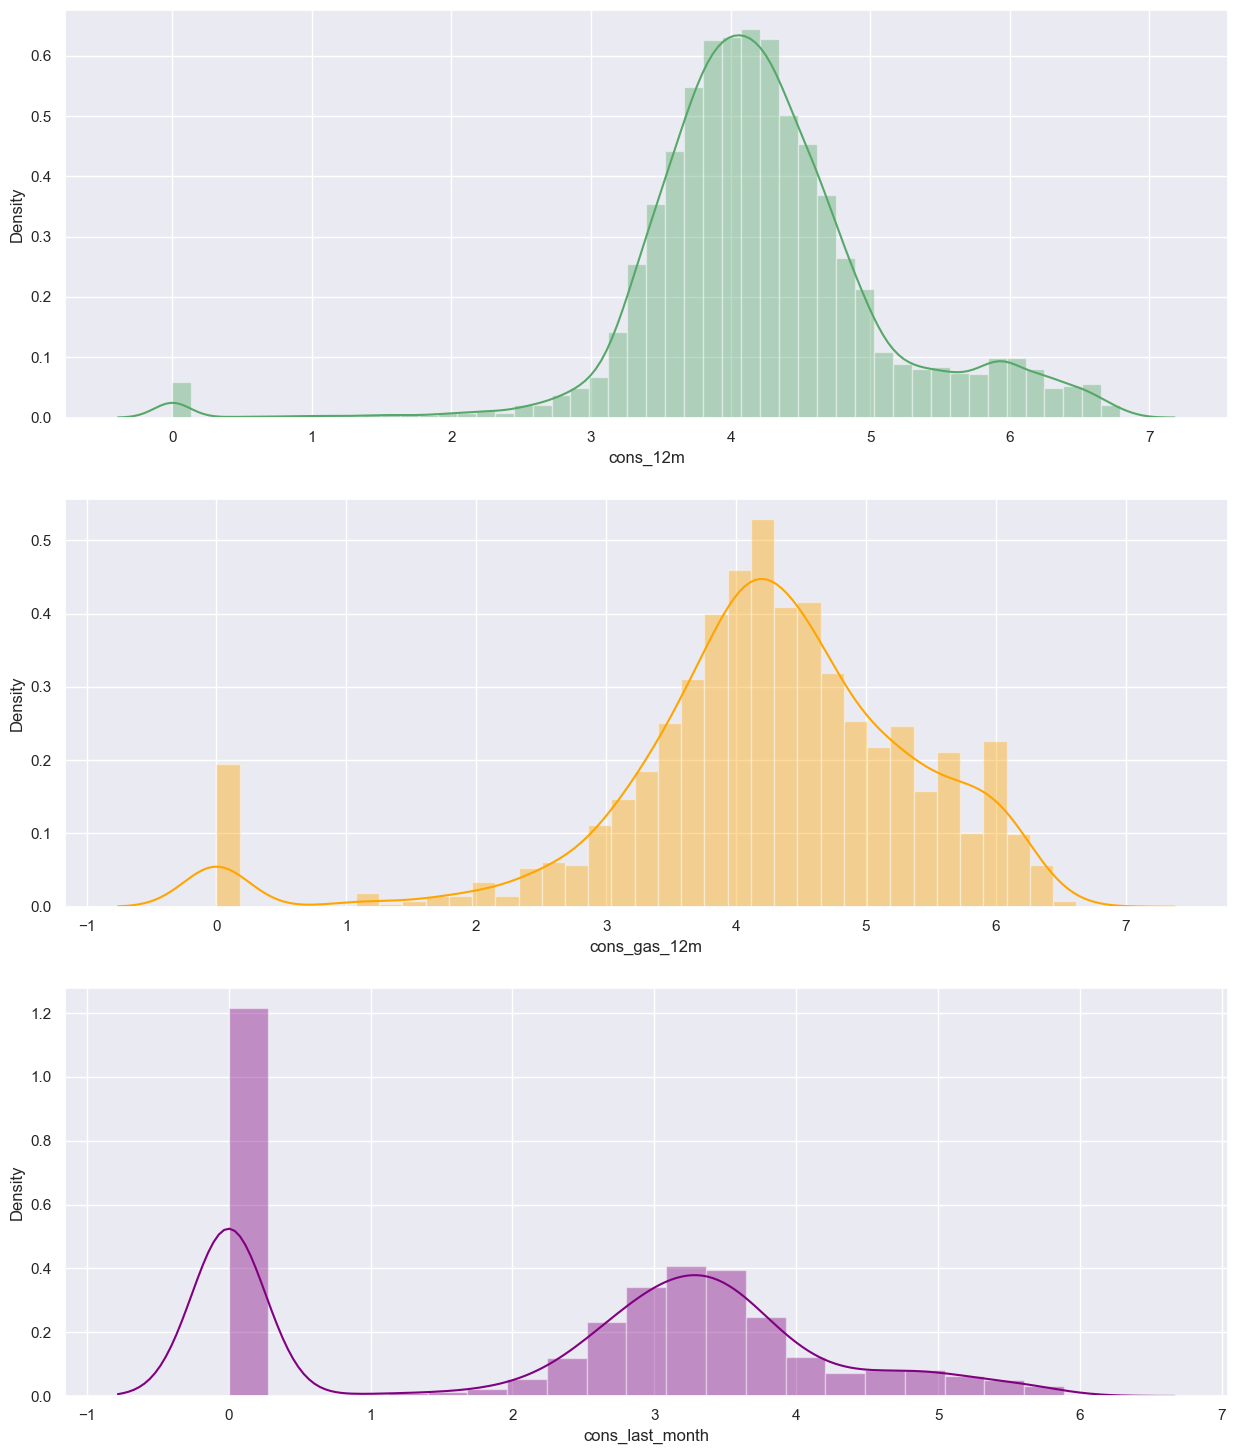

In [52]:
fig, axs = plt.subplots(nrows=3, figsize=(15, 18))

# Plot histograms

sns.distplot((eda_data["cons_12m"].dropna()), ax=axs[0], color='g')
sns.distplot((eda_data[eda_data["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1], color='orange')
sns.distplot((eda_data["cons_last_month"].dropna()), ax=axs[2], color='purple')

plt.show()

### Checking Correlations of Variables
* In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don't work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model.

* For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

* This is important because it reveals the linear relationships between features. We want features to correlate with churn, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

* For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption.

* Ideally, we want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

* So now let's look at how all the features within the model are correlated.

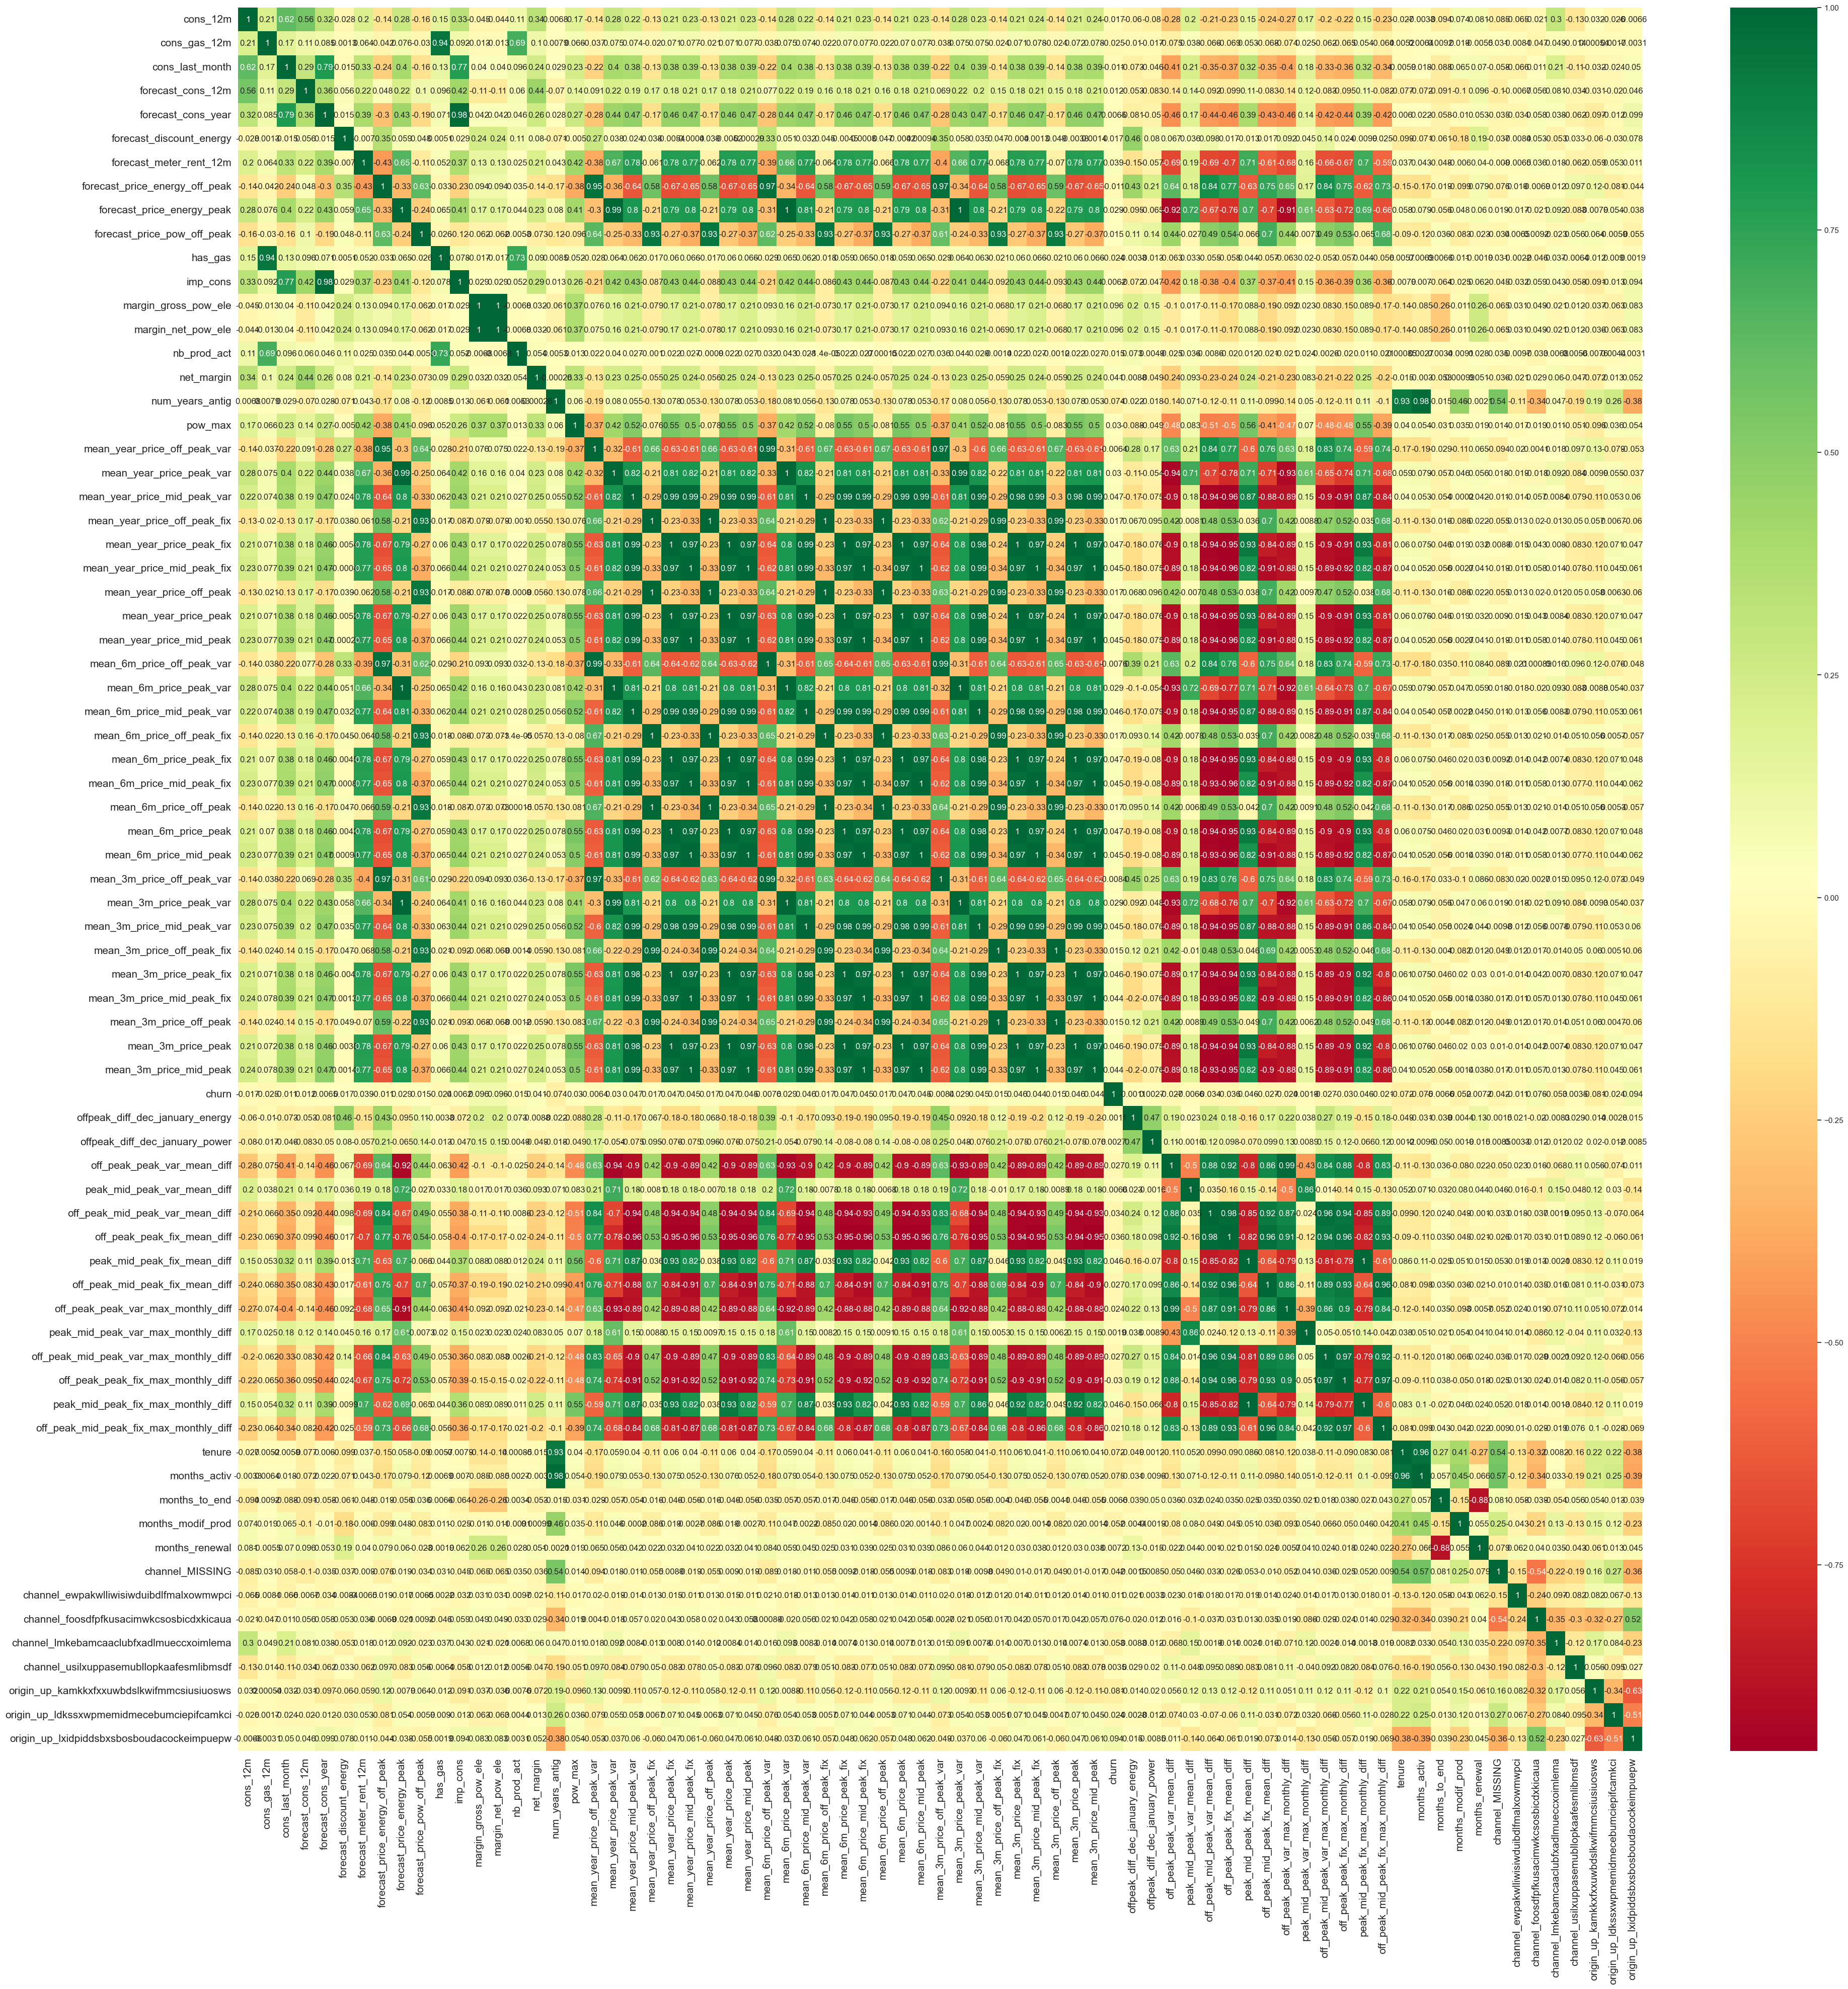

In [53]:
correlation = eda_data.corr()
# Correlation Heatmap

plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}, 
    cmap='RdYlGn'
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# View of graph
plt.show()

* I will remove two variables(num_years_antig and forecast_cons_year) which exhibit a high correlation with other independent features.

In [54]:
eda_data = eda_data.drop(columns=['num_years_antig', 'forecast_cons_year'])

In [55]:
eda_data.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m  \
0           0.000000                       0.0                 0.444045   
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1   0.00000                 25.44   
1                    44.311378        0   0.00000                 16.38   
2                    44.311378        0   0.00000                 28.60   
3                    44.311378        0   0.00000                 30.22   
4                    40.606701        0   1.72689                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
0               25.44            2      678.99   43.648   
1               16.38            1       18.89   13.800   
2               28.60            1        6.60   13.856   
3               30.22            1       25.46   13.200   
4               44.91            1       47.98   19.800   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.124787                  0.100749   
1                      0.149609                  0.007124   
2                      0.170512                  0.088421   
3                      0.151210                  0.000000   
4                      0.124174                  0.103638   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.066530                     40.942265   
1                      0.000000                     44.311375   
2                      0.000000                     44.385450   
3                      0.000000                     44.400265   
4                      0.072865                     40.688156   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 22.352010                     14.901340   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.412893                     16.275263   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_mid_peak  \
0                 41.067053             22.452760                 14.967871   
1                 44.460984              0.007124                  0.000000   
2                 44.555962              0.088421                  0.000000   
3                 44.551475              0.000000                  0.000000   
4                 40.812330             24.516531                 16.348129   

   mean_6m_price_off_peak_var  mean_6m_price_peak_var  \
0                    0.123598                0.098104   
1                    0.147851                0.014247   
2                    0.168569                0.088535   
3                    0.149330                0.000000   
4                  

In [56]:
eda_data.tail()

id  cons_12m  cons_gas_12m  \
14600  18463073fb097fc0ac5d3e040f356987  4.508812      4.680707   
14601  d0a6f71671571ed83b2645d23af6de00  3.858778      0.000000   
14602  10e6828ddd62cbcf687cb74928c4c2d2  3.265996      0.000000   
14603  1cf20fd6206d7678d5bcafd28c53b4db  2.120574      0.000000   
14604  563dde550fd624d7352f3de77c0cdfcd  3.941064      0.000000   

       cons_last_month  forecast_cons_12m  forecast_discount_energy  \
14600         0.000000           3.667360                       0.0   
14601         2.260071           2.801191                       0.0   
14602         2.255273           2.281919                       0.0   
14603         0.000000           1.308351                       0.0   
14604         0.000000           2.882758                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
14600                 1.291591                        0.138305   
14601                 2.161458                        0.100167   
14602                 2.115943                        0.116900   
14603                 0.912753                        0.145711   
14604                 0.315970                        0.167086   

       forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  \
14600                    0.000000                    44.311378        1   
14601                    0.091892                    58.995952        0   
14602                    0.100015                    40.606701        0   
14603                    0.000000                    44.311378        0   
14604                    0.088454                    45.311378        0   

       imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
14600  0.000000                 27.88               27.88            2   
14601  1.228913                  0.00                0.00            1   
14602  1.279895                 39.84               39.84            1   
14603  0.000000                 13.08               13.08            1   
14604  0.000000                 11.84               11.84            1   

       net_margin  pow_max  mean_year_price_off_peak_var  \
14600      381.77   15.000                      0.144124   
14601       90.34    6.000                      0.106799   
14602       20.38   15.935                      0.124338   
14603        0.96   11.000                      0.149609   
14604       96.34   10.392                      0.168662   

       mean_year_price_peak_var  mean_year_price_mid_peak_var  \
14600                  0.000000                      0.000000   
14601                  0.095406                      0.070817   
14602                  0.103794                      0.073160   
14603                  0.007124                      0.000000   
14604                  0.087344                      0.000000   

       mean_year_price_off_peak_fix  mean_year_price_peak_fix  \
14600                     44.370635                  0.000000   
14601                     59.015674                 36.393379   
14602                     40.701732                 24.421038   
14603                     44.311375                  0.000000   
14604                     44.266930                  0.000000   

       mean_year_price_mid_peak_fix  mean_year_price_off_peak  \
14600                      0.000000                 44.514760   
14601                      8.345418                 59.122473   
14602                     16.280694                 40.826071   
14603                      0.000000                 44.460984   
14604                      0.000000                 44.435592   

       mean_year_price_peak  mean_year_price_mid_peak  \
14600              0.000000                  0.000000   
14601             36.488785                  8.416235   
14602             24.524832                 16.353854   
14603              0.007124                  0.000000   
14604              0.087344                  0.000000   

       mean_6m_price_off_peak_var  me

In [57]:
eda_data.sample(10)

id  cons_12m  cons_gas_12m  \
5529   e5c8f330fa59c174e8c15f80f7b91012  3.969835      0.000000   
1785   14ccb05be62d74f769309d18f0739ba4  3.533518      0.000000   
6076   e20c4871aa343db33d38bb71b6ab5564  4.192317      0.000000   
3790   3da814f57634da5f5d1bb101f57fc25d  4.233681      4.503273   
2695   e74dd364ef942d16a56ac89784960465  4.720242      0.000000   
999    76bbf7a3b77612efb8d44557ea97da20  3.884172      0.000000   
8151   a19aa2f21430c518e86d420fecbbf615  3.440594      0.000000   
153    75bc0c467e34717282cb63779718310e  5.436501      0.000000   
3834   7c55792e7a153de4180d98f852bb974e  4.469837      0.000000   
11702  d2b668f70a0669747f1037ba9f684c70  5.022379      5.314750   

       cons_last_month  forecast_cons_12m  forecast_discount_energy  \
5529          2.866878           3.144450                       0.0   
1785          0.000000           2.522744                       0.0   
6076          3.057286           3.368352                       0.0   
3790          3.455302           3.336005                       0.0   
2695          3.383995           3.469557                       0.0   
999           0.000000           2.351158                       0.0   
8151          2.389166           2.619239                       0.0   
153           4.188028           3.598703                       0.0   
3834          3.394802           2.305351                       0.0   
11702         3.868233           3.968183                       0.0   

       forecast_meter_rent_12m  forecast_price_energy_off_peak  \
5529                  1.282622                        0.145711   
1785                  2.079398                        0.114603   
6076                  0.000000                        0.145711   
3790                  0.873321                        0.144058   
2695                  2.165511                        0.116329   
999                   1.278067                        0.142881   
8151                  1.062206                        0.145711   
153                   2.121855                        0.114603   
3834                  2.156125                        0.120372   
11702                 2.545159                        0.095558   

       forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  \
5529                     0.000000                    44.311378        0   
1785                     0.098261                    40.606701        0   
6076                     0.000000                    44.311378        0   
3790                     0.000000                    44.311378        1   
2695                     0.099439                    40.606701        0   
999                      0.000000                    46.305378        0   
8151                     0.000000                    44.311378        0   
153                      0.098261                    40.606701        0   
3834                     0.103487                    40.606701        0   
11702                    0.087283                    58.995952        1   

       imp_cons  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  \
5529   2.036110                 12.36               12.36            1   
1785   0.000000                 23.40               23.40            1   
6076   2.226651                 29.64               29.64            1   
3790   2.616948                  3.68                3.68            2   
2695   2.393312                 34.56               34.56            1   
999    0.000000                 21.64               21.64            1   
8151   1.565494                 31.53               31.53            1   
153    2.426788                 24.18               24.18            1   
3834   0.000000                 34.45               34.45            1   
11702  2.788953                  0.12                0.12            2   

       net_margin  pow_max  mean_year_price_off_peak_var  \
5529       136.23   10.392                      0.149682   
1785        42.04   20.785   

### Building Prediction Model using Random Forest Classifier
#### Data sampling
* Our dataset should initially be divided into training and test samples. We do this in order to imitate a real-world scenario by making predictions for our test sample without revealing these data points to the predictive model. This allows us to assess how effectively our model generalises to new data, which is essential.

* In this example, we'll utilise a split of 75–25 percent between train and test, which is typically between 20 and 30 percent.

In [58]:
# Make a copy of our data

train_df = eda_data.copy()

In [59]:
# Separate target variable from independent variables

X = eda_data.drop(columns=['id', 'churn'])
X.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  0.000000      4.739944         0.000000           0.000000   
1  3.668479      0.000000         0.000000           2.280920   
2  2.736397      0.000000         0.000000           1.689841   
3  3.200029      0.000000         0.000000           2.382089   
4  3.646011      0.000000         2.721811           2.650065   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 0.444045   
1                       0.0                 1.237292   
2                       0.0                 1.599009   
3                       0.0                 1.318689   
4                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1   0.00000                 25.44   
1                    44.311378        0   0.00000                 16.38   
2                    44.311378        0   0.00000                 28.60   
3                    44.311378        0   0.00000                 30.22   
4                    40.606701        0   1.72689                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
0               25.44            2      678.99   43.648   
1               16.38            1       18.89   13.800   
2               28.60            1        6.60   13.856   
3               30.22            1       25.46   13.200   
4               44.91            1       47.98   19.800   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.124787                  0.100749   
1                      0.149609                  0.007124   
2                      0.170512                  0.088421   
3                      0.151210                  0.000000   
4                      0.124174                  0.103638   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.066530                     40.942265   
1                      0.000000                     44.311375   
2                      0.000000                     44.385450   
3                      0.000000                     44.400265   
4                      0.072865                     40.688156   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 22.352010                     14.901340   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.412893                     16.275263   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_mid_peak  \
0                 41.067053             22.452760                 14.967871   
1                 44.460984              0.007124                  0.000000   
2                 44.555962              0.088421                  0.000000   
3                 44.551475              0.000000                  0.000000   
4                 40.812330             24.516531                 16.348129   

   mean_6m_price_off_peak_var  mean_6m_price_peak_var  \
0                    0.123598                0.098104   
1                    0.147851                0.014247   
2                    0.168569                0.088535   
3                    0.149330                0.000000   
4                    0.121266                0.102368   

   mean_6m_price_mid_peak_var  mean_6m_price_off_peak_fix  \
0                    0.061525                   41.318559   
1            

In [60]:
print(X.shape)

(14605, 70)


In [61]:
y = eda_data['churn']
y.head()

0    1
1    0
2    0
3    0
4    0
Name: churn, dtype: int64

In [62]:
print(y.shape)

(14605,)


### Dividing the Data as 75% for training and 25% for test data

In [63]:
## Split data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [64]:
#Checking shape of train and test data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10953, 70)
(10953,)
(3652, 70)
(3652,)


### Random Forest Classifier
* we are using a Random Forest classifier in this example. A Random Forest sits within the category of ensemble algorithms because internally the Forest refers to a collection of Decision Trees which are tree-based learning algorithms. As the data scientist, we can control how large the forest is (that is, how many decision trees you want to include).

* The reason why an ensemble algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm.

* With ensemble methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. We would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if we train our learners not to overfit, but to learn weak patterns within the data and we have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

* Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging.

* As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution. Some additional advantages of the random forest classifier include:

* The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled

* It is able to handle non-linear parameters better than linear based models

* On the flip side, some disadvantages of the random forest classifier include:

* The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.

* Training time can be longer due to the increased complexity and size of thee ensemble

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rf_classifier = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

### Model prediction on X_test data

In [67]:
## prediction of test data
y_pred = rf_classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

### Model Evaluation
* Now let's evaluate how well this trained model is able to predict the values of the test dataset.

**We are going to use 3 metrics to evaluate performance:**

1. Accuracy = the ratio of correctly predicted observations to the total observations

2. Precision = the ability of the classifier to not label a negative sample as positive

3. Recall = the ability of the classifier to find all the positive samples

4. ROC & AUC = It tells how much the model is capable of distinguishing between classes.

5. K-Fold Cross Validation = how the results of a statistical analysis will generalize to an independent data set.

* The reason why we are using these five metrics is because a simple accuracy is not always a good measure to use. To give an example, let's say you're predicting heart failures with patients in a hospital and there were 100 patients out of 1000 that did have a heart failure.

* If you predicted 80 out of 100 (80%) of the patients that did have a heart failure correctly, you might think that you've done well! However, this also means that you predicted 20 wrong and what may the implications of predicting these remaining 20 patients wrong? Maybe they miss out on getting vital treatment to save their lives.

* As well as this, what about the impact of predicting negative cases as positive (people not having heart failure being predicted that they did), maybe a high number of false positives means that resources get used up on thee wrong people and a lot of time is wasted when they could have been helping the real heart failure sufferers.

* This is just an example, but it illustrates why other performance metrics are necessary such Precision and Recall, which are good measures to use in a classification scenario.

### Importing Model Evaluation Metrics

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

### Model Accuracy Score

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:- ", accuracy)
print("\n ----- Classification Report ----- \n")
print(classification_report(y_test, y_pred))

Accuracy score:-  0.9033406352683461

 ----- Classification Report ----- 

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3279
           1       0.92      0.06      0.11       373

    accuracy                           0.90      3652
   macro avg       0.91      0.53      0.53      3652
weighted avg       0.90      0.90      0.86      3652



### Confusion Matrix

[[3277    2]
 [ 351   22]]


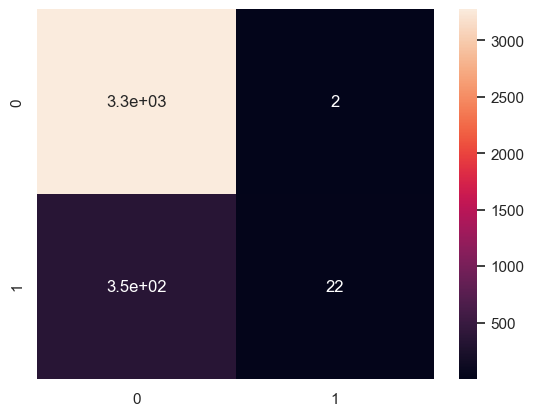

In [70]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)
plt.show()

In [71]:
#Precision
print("Precision Score is - ", precision_score(y_test, y_pred))

Precision Score is -  0.9166666666666666


In [72]:
#Recall
print("Recall Score is - ", recall_score(y_test, y_pred))

Recall Score is -  0.058981233243967826


In [73]:
#F1 Score
print("F1 Score is - ", f1_score(y_test, y_pred))

F1 Score is -  0.11083123425692695


### ROC/AUC

In [74]:
auc = roc_auc_score(y_test, y_pred)
print("AUC score:- ", auc)

AUC score:-  0.5291856455942316


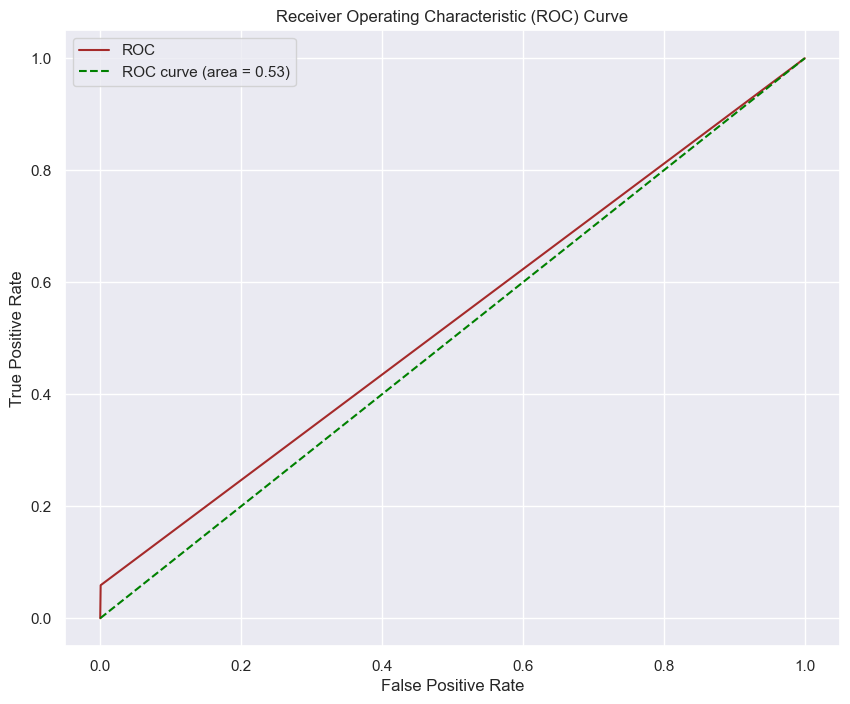

In [75]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='brown', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### K-Fold Cross Validation

In [76]:
# Applying 5-Fold Cross Validation
from sklearn.model_selection import cross_val_score

In [77]:
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(cv_scores))

Cross-validation scores:[0.90643542 0.91282519 0.90871748 0.90684932 0.90684932]


* We can summarize the cross-validation accuracy by calculating its mean.

In [78]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(cv_scores.mean()))

Average cross-validation score: 0.9083


### MODEL EVALUATION SUMMARY :
1. Model Accuracy : 0.9033
2. Precision : 0.9166
3. Recall : 0.0589
4. F1 Score : 0.1108
5. AUC : 0.5291
6. K-Fold : 0.9083

### Model Understanding
* Examining feature_importances is a quick and easy way to comprehend a model's findings. There are several ways to calculate feature importance, however using the Random Forest classifier, we are able to extract feature_importances using the built-in approach on the trained model. feature_importances reflect the importance of a feature within the prediction model. The amount of times each feature is used for splitting across all trees in the Random Forest scenario is represented by the feature importance.

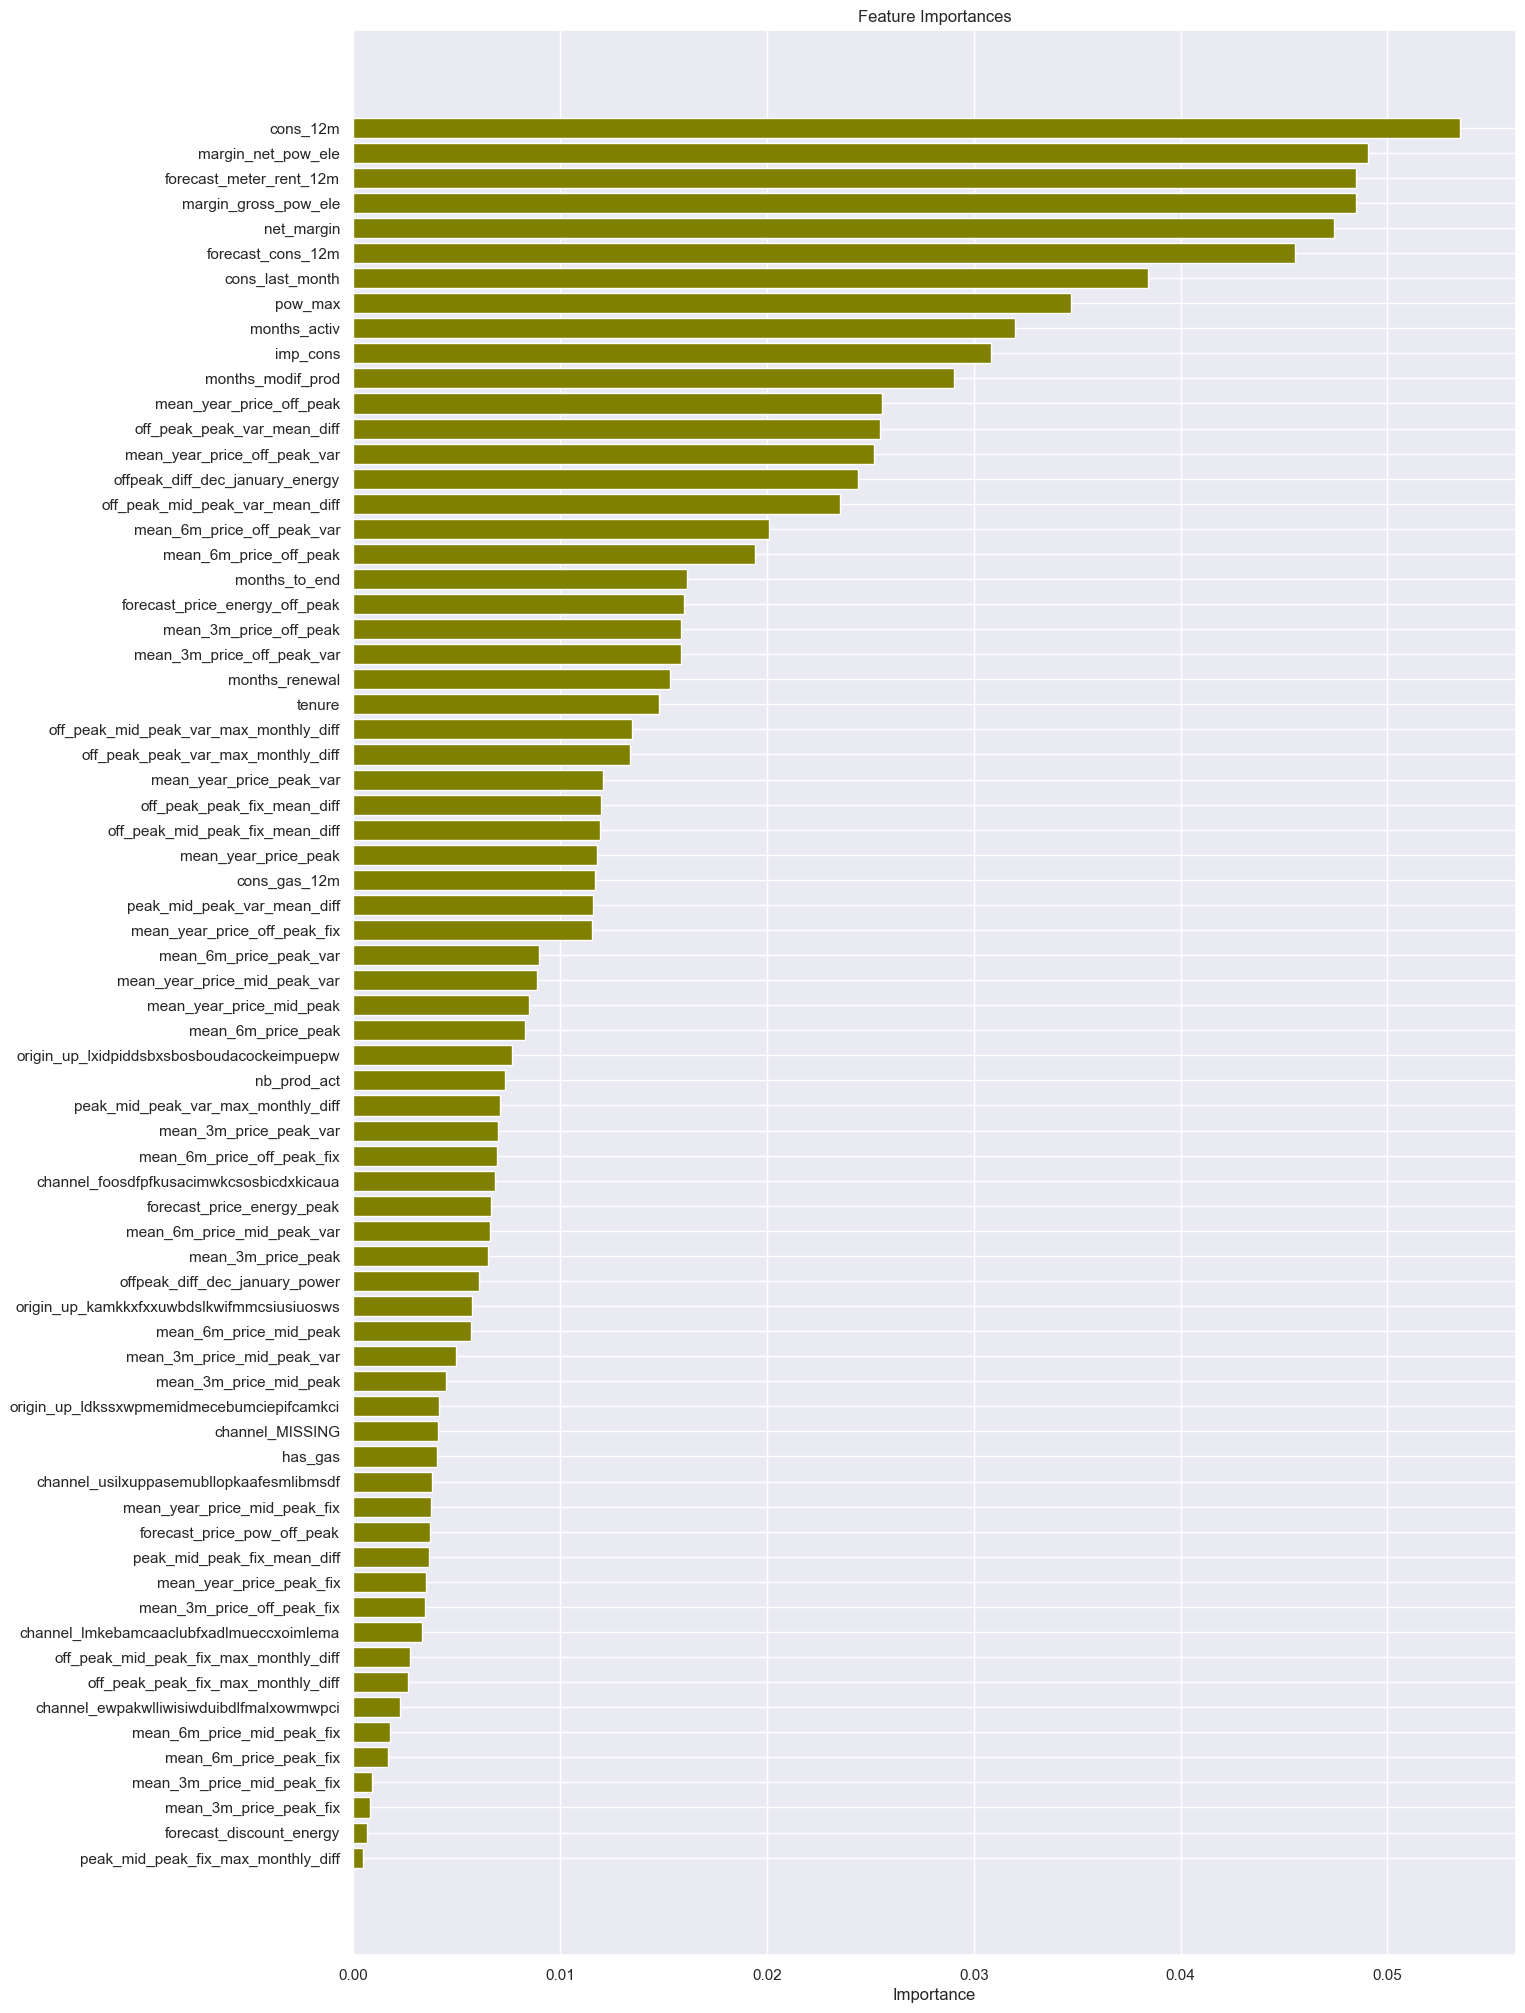

In [79]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='olive', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

**From this chart, we can observe the following points:**

* Net margin on power subscription and consumption over 12 months is a top driver for churn in this model

* Forecasted bill of meter rental for the next 2 months also is an influential driver

* Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract

* The feature that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it

* Our price sensitivity features are scattered around but are not the main driver for a customer churning

* The last observation is important because this relates back to our original hypothesis:

**Is churn driven by the customers' price sensitivity ?**

Based on the output of the feature importances, it is not a main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [80]:
proba_predictions = rf_classifier.predict_proba(X_test)

In [81]:
probabilities = proba_predictions[:, 1]

In [82]:
X_test = X_test.reset_index()

In [83]:
X_test.drop(columns='index', inplace=True)

### Saving the dataframe to "predicted_data.csv" file

In [84]:
X_test['churn'] = y_pred.tolist()

In [85]:
X_test['churn_probability'] = probabilities.tolist()

In [86]:
X_test.to_csv('predicted_data.csv')

### Business impact of discount
* We conduct a brief analysis on the discount strategy proposed. This is just 1 way to solve it, there may be many other ways!

* The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.

### Workflow
* Our task is to calculate the forecast revenue for the set of customers:

**When no discount is offered**
- And when a discount is offered based on a probability cutoff to decide who should receive the 20% discount
- And hence to decide where the cut-off should be set in order to maximise revenue

### Data loading

In [87]:
test_data = pd.read_csv('predicted_data.csv')
test_data.drop(test_data.columns[0], axis=1, inplace=True)
test_data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  5.705621      0.000000         4.715176           0.000000   
1  6.000648      5.203623         5.050759           2.818932   
2  0.000000      0.000000         0.000000           0.000000   
3  4.345433      0.000000         0.000000           3.516690   
4  3.201943      0.000000         2.484300           2.523109   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 2.166341   
1                       0.0                 1.312177   
2                       0.0                 2.125774   
3                       0.0                 1.304921   
4                       0.0                 1.238548   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.120372                    0.103487   
1                        0.144902                    0.000000   
2                        0.092453                    0.086393   
3                        0.142996                    0.000000   
4                        0.141434                    0.000000   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        0  0.000000                 99.96   
1                    44.311378        1  2.234061                 19.20   
2                    59.173468        0  0.000000                  0.00   
3                    44.311378        0  0.000000                 29.76   
4                    44.311378        0  1.648262                 10.08   

   margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
0               99.96            1        0.00   40.000   
1               19.20            2       55.09   10.392   
2                0.00            1        0.00    9.900   
3               29.76            1      317.74   13.200   
4               10.08            1       18.25   10.392   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.127558                  0.107086   
1                      0.148958                  0.000000   
2                      0.104044                  0.092514   
3                      0.147965                  0.000000   
4                      0.221441                  0.000000   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.076709                     40.565972   
1                      0.000000                     44.370635   
2                      0.065678                     59.173468   
3                      0.000000                     44.266930   
4                      0.000000                     44.370636   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 24.339579                     16.226385   
1                  0.000000                      0.000000   
2                 36.490689                      8.367731   
3                  0.000000                      0.000000   
4                  0.000000                      0.000000   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_mid_peak  \
0                 40.693529             24.446665                 16.303095   
1                 44.519593              0.000000                  0.000000   
2                 59.277512             36.583203                  8.433409   
3                 44.414895              0.000000                  0.000000   
4                 44.592077              0.000000                  0.000000   

   mean_6m_price_off_peak_var  mean_6m_price_peak_var  \
0                    0.124231                0.105422   
1                    0.147532                0.000000   
2                    0.101630                0.091216   
3                    0.146184                0.000000   
4                    0.165348                0.000000   

   mean_6m_price_mid_peak_var  mean_6m_price_off_peak_fix  \
0                    0.076910                   40.565973   
1            

In [88]:
test_data.tail()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
3647  4.244450      3.256477         3.185542           3.253113   
3648  3.854488      0.000000         3.280123           0.000000   
3649  4.480697      4.863531         3.423574           3.478985   
3650  3.931966      3.509874         2.352183           2.914845   
3651  3.441852      0.000000         0.000000           2.360006   

      forecast_discount_energy  forecast_meter_rent_12m  \
3647                       0.0                 2.088313   
3648                       0.0                 0.000000   
3649                       0.0                 2.121822   
3650                       0.0                 1.288249   
3651                       0.0                 1.229938   

      forecast_price_energy_off_peak  forecast_price_energy_peak  \
3647                        0.116509                    0.101397   
3648                        0.000600                    0.000000   
3649                        0.115237                    0.100123   
3650                        0.140621                    0.000000   
3651                        0.146694                    0.000000   

      forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
3647                    40.606701        1  2.196121                  0.90   
3648                     0.000000        0  0.000000                 33.12   
3649                    40.606701        1  2.411148                  1.74   
3650                    44.311378        1  1.517460                 22.52   
3651                    44.311378        0  0.000000                 26.04   

      margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
3647                0.90            3      244.31   20.000   
3648               33.12            1       79.33   13.200   
3649                1.74            3      359.42   39.000   
3650               22.52            3       80.41   13.856   
3651               26.04            1       23.74   10.392   

      mean_year_price_off_peak_var  mean_year_price_peak_var  \
3647                      0.125712                  0.105233   
3648                      0.000600                  0.000000   
3649                      0.123638                  0.103159   
3650                      0.144990                  0.000000   
3651                      0.150700                  0.000000   

      mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
3647                      0.075000                     40.565972   
3648                      0.000000                      0.000000   
3649                      0.072926                     40.565972   
3650                      0.000000                     44.355820   
3651                      0.000000                     44.266930   

      mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
3647                 24.339579                     16.226385   
3648                  0.000000                      0.000000   
3649                 24.339579                     16.226385   
3650                  0.000000                      0.000000   
3651                  0.000000                      0.000000   

      mean_year_price_off_peak  mean_year_price_peak  \
3647                 40.691684             24.444812   
3648                  0.000600              0.000000   
3649                 40.689610             24.442738   
3650                 44.500811              0.000000   
3651                 44.417631              0.000000   

      mean_year_price_mid_peak  mean_6m_price_off_peak_var  \
3647                 16.301385                    0.121359   
3648                  0.000000                    0.000600   
3649                 16.299312                    0.120298   
3650                  0.000000                    0.143238   
3651                  0.000000                    0.148727   

      mean_6m_price_peak_var  mean_6m_price_mid_peak_var  \
3647                0.102536              

In [89]:
test_data.sample(10)

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
1446  3.882183       0.00000         0.000000           0.000000   
987   4.400469       0.00000         3.048830           1.574379   
3215  4.974604       0.00000         0.000000           2.572697   
1468  3.926959       0.00000         3.231979           3.102327   
2992  3.735519       3.58625         2.696356           2.589871   
3144  4.106803       0.00000         0.000000           3.165351   
2234  2.198657       0.00000         0.000000           1.251151   
1389  3.990472       0.00000         0.000000           3.023372   
2280  4.157910       0.00000         3.303196           3.199862   
1518  3.941064       0.00000         0.000000           2.882758   

      forecast_discount_energy  forecast_meter_rent_12m  \
1446                       0.0                 0.000000   
987                        0.0                 1.209515   
3215                       0.0                 1.292699   
1468                       0.0                 1.286007   
2992                       0.0                 1.315970   
3144                       0.0                 1.082426   
2234                       0.0                 1.613102   
1389                       0.0                 1.228144   
2280                       0.0                 1.530968   
1518                       0.0                 0.315970   

      forecast_price_energy_off_peak  forecast_price_energy_peak  \
1446                        0.000600                    0.000000   
987                         0.273963                    0.000000   
3215                        0.147506                    0.000000   
1468                        0.144039                    0.000000   
2992                        0.143460                    0.000000   
3144                        0.165793                    0.088539   
2234                        0.165794                    0.087899   
1389                        0.166950                    0.089695   
2280                        0.158855                    0.080956   
1518                        0.167086                    0.088454   

      forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
1446                     0.000000        0  0.000000                 34.80   
987                     59.266378        0  0.000000                157.40   
3215                    46.305378        0  0.000000                 21.09   
1468                    45.308378        0  2.395449                 13.58   
2992                    45.806878        1  0.000000                 16.14   
3144                    44.311378        0  0.000000                 14.70   
2234                    44.311378        0  0.000000                 30.22   
1389                    44.311378        0  0.000000                 14.57   
2280                    44.311378        0  2.372765                 31.20   
1518                    45.311378        0  0.000000                 11.84   

      margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
1446               34.80            1      113.86   13.900   
987               157.40            1       21.12   10.500   
3215               21.09            1       34.69   10.392   
1468               13.58            1      107.69   11.951   
2992               16.14            2       32.37   10.392   
3144               14.70            1      103.47   13.860   
2234               30.22            1        1.92   13.200   
1389               14.57            1      107.68   10.350   
2280               31.20            1       68.36   13.856   
1518               11.84            1       96.34   10.392   

      mean_year_price_off_peak_var  mean_year_price_peak_var  \
1446                      0.000600                  0.000000   
987                       0.247730                  0.000000   
3215                      0.150344                  0.000000   
1468                      0.149544                  0.000000

### Calculating a baseline revenue estimate (no intervention)
* Calculate a baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast price and actual churn outcome. Call this basecase_revenue.

* For customers who end up churning, we should reduce our forecast revenue calculation by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year). Call this new variable basecase_revenue_after_churn, ie basecase_revenue_after_churn = basecase_revenue(1 -0.919 churn)

In [90]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m']) + 1) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

In [91]:
# Taking churn into account

test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])

In [92]:
test_data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0  5.705621      0.000000         4.715176           0.000000   
1  6.000648      5.203623         5.050759           2.818932   
2  0.000000      0.000000         0.000000           0.000000   
3  4.345433      0.000000         0.000000           3.516690   
4  3.201943      0.000000         2.484300           2.523109   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                 2.166341   
1                       0.0                 1.312177   
2                       0.0                 2.125774   
3                       0.0                 1.304921   
4                       0.0                 1.238548   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.120372                    0.103487   
1                        0.144902                    0.000000   
2                        0.092453                    0.086393   
3                        0.142996                    0.000000   
4                        0.141434                    0.000000   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        0  0.000000                 99.96   
1                    44.311378        1  2.234061                 19.20   
2                    59.173468        0  0.000000                  0.00   
3                    44.311378        0  0.000000                 29.76   
4                    44.311378        0  1.648262                 10.08   

   margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
0               99.96            1        0.00   40.000   
1               19.20            2       55.09   10.392   
2                0.00            1        0.00    9.900   
3               29.76            1      317.74   13.200   
4               10.08            1       18.25   10.392   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.127558                  0.107086   
1                      0.148958                  0.000000   
2                      0.104044                  0.092514   
3                      0.147965                  0.000000   
4                      0.221441                  0.000000   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.076709                     40.565972   
1                      0.000000                     44.370635   
2                      0.065678                     59.173468   
3                      0.000000                     44.266930   
4                      0.000000                     44.370636   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 24.339579                     16.226385   
1                  0.000000                      0.000000   
2                 36.490689                      8.367731   
3                  0.000000                      0.000000   
4                  0.000000                      0.000000   

   mean_year_price_off_peak  mean_year_price_peak  mean_year_price_mid_peak  \
0                 40.693529             24.446665                 16.303095   
1                 44.519593              0.000000                  0.000000   
2                 59.277512             36.583203                  8.433409   
3                 44.414895              0.000000                  0.000000   
4                 44.592077              0.000000                  0.000000   

   mean_6m_price_off_peak_var  mean_6m_price_peak_var  \
0                    0.124231                0.105422   
1                    0.147532                0.000000   
2                    0.101630                0.091216   
3                    0.146184                0.000000   
4                    0.165348                0.000000   

   mean_6m_price_mid_peak_var  mean_6m_price_off_peak_fix  \
0                    0.076910                   40.565973   
1            

In [93]:
test_data.tail()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
3647  4.244450      3.256477         3.185542           3.253113   
3648  3.854488      0.000000         3.280123           0.000000   
3649  4.480697      4.863531         3.423574           3.478985   
3650  3.931966      3.509874         2.352183           2.914845   
3651  3.441852      0.000000         0.000000           2.360006   

      forecast_discount_energy  forecast_meter_rent_12m  \
3647                       0.0                 2.088313   
3648                       0.0                 0.000000   
3649                       0.0                 2.121822   
3650                       0.0                 1.288249   
3651                       0.0                 1.229938   

      forecast_price_energy_off_peak  forecast_price_energy_peak  \
3647                        0.116509                    0.101397   
3648                        0.000600                    0.000000   
3649                        0.115237                    0.100123   
3650                        0.140621                    0.000000   
3651                        0.146694                    0.000000   

      forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
3647                    40.606701        1  2.196121                  0.90   
3648                     0.000000        0  0.000000                 33.12   
3649                    40.606701        1  2.411148                  1.74   
3650                    44.311378        1  1.517460                 22.52   
3651                    44.311378        0  0.000000                 26.04   

      margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
3647                0.90            3      244.31   20.000   
3648               33.12            1       79.33   13.200   
3649                1.74            3      359.42   39.000   
3650               22.52            3       80.41   13.856   
3651               26.04            1       23.74   10.392   

      mean_year_price_off_peak_var  mean_year_price_peak_var  \
3647                      0.125712                  0.105233   
3648                      0.000600                  0.000000   
3649                      0.123638                  0.103159   
3650                      0.144990                  0.000000   
3651                      0.150700                  0.000000   

      mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
3647                      0.075000                     40.565972   
3648                      0.000000                      0.000000   
3649                      0.072926                     40.565972   
3650                      0.000000                     44.355820   
3651                      0.000000                     44.266930   

      mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
3647                 24.339579                     16.226385   
3648                  0.000000                      0.000000   
3649                 24.339579                     16.226385   
3650                  0.000000                      0.000000   
3651                  0.000000                      0.000000   

      mean_year_price_off_peak  mean_year_price_peak  \
3647                 40.691684             24.444812   
3648                  0.000600              0.000000   
3649                 40.689610             24.442738   
3650                 44.500811              0.000000   
3651                 44.417631              0.000000   

      mean_year_price_mid_peak  mean_6m_price_off_peak_var  \
3647                 16.301385                    0.121359   
3648                  0.000000                    0.000600   
3649                 16.299312                    0.120298   
3650                  0.000000                    0.143238   
3651                  0.000000                    0.148727   

      mean_6m_price_peak_var  mean_6m_price_mid_peak_var  \
3647                0.102536              

In [94]:
test_data.sample(10)

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
3526  3.685563           0.0         0.000000           2.728078   
2201  3.409933           0.0         2.553883           2.571732   
3483  5.185893           0.0         4.403721           3.129522   
1998  4.460010           0.0         3.452706           3.474495   
1138  4.608323           0.0         0.000000           2.940835   
3168  4.251297           0.0         3.251881           3.262778   
2039  2.598791           0.0         1.690196           1.777209   
1427  3.632761           0.0         0.000000           2.813448   
2178  4.216034           0.0         3.003029           2.587868   
249   4.769067           0.0         3.641771           3.141603   

      forecast_discount_energy  forecast_meter_rent_12m  \
3526                       0.0                 1.584783   
2201                       0.0                 1.320354   
3483                       0.0                 2.121199   
1998                       0.0                 2.150511   
1138                       0.0                 1.223755   
3168                       0.0                 2.115976   
2039                       0.0                 1.241048   
1427                       0.0                 1.281488   
2178                       0.0                 1.239800   
249                        0.0                 1.241048   

      forecast_price_energy_off_peak  forecast_price_energy_peak  \
3526                        0.166950                    0.089695   
2201                        0.140621                    0.000000   
3483                        0.116910                    0.100572   
1998                        0.115174                    0.098837   
1138                        0.138847                    0.000000   
3168                        0.116340                    0.099998   
2039                        0.144902                    0.000000   
1427                        0.146694                    0.000000   
2178                        0.144902                    0.000000   
249                         0.162326                    0.085068   

      forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
3526                    44.311378        0  0.000000                 19.20   
2201                    44.311378        0  1.713659                 10.08   
3483                    40.606701        0  2.318293                 50.31   
1998                    40.606701        0  2.452400                 25.98   
1138                    44.311378        0  0.000000                 13.40   
3168                    40.606701        0  2.252659                 21.27   
2039                    44.311378        0  0.905796                 15.72   
1427                    44.311378        0  0.000000                 31.64   
2178                    44.311378        0  0.000000                 10.08   
249                     44.311378        0  2.682768                  8.98   

      margin_net_pow_ele  nb_prod_act  net_margin  pow_max  \
3526               19.20            1       57.04   10.392   
2201               10.08            1       29.46   10.392   
3483               50.31            1      161.74   35.000   
1998               25.98            1      319.37   41.500   
1138               13.40            1       61.32   13.856   
3168               21.27            1      219.74   20.000   
2039               15.72            1        5.41   13.200   
1427               31.64            1       67.98   13.850   
2178               10.08            1       35.07   10.392   
249                 8.98            2      101.78   10.392   

      mean_year_price_off_peak_var  mean_year_price_peak_var  \
3526                      0.170973                  0.089403   
2201                      0.144937                  0.000000   
3483                      0.125246                  0.104856   
1998                      0.122696                  0.102080

### Calculate the estimated benefits and costs of intervention

**Now, pick a cut-off probability (eg 0.5) so that:**
* Customers with a higher churn probability than the cut-off get a discount, and
* Customers below the churn-probability do not get a discount.

**From this, calculate the revenue of the intervention scenario assuming:**
* All customers who are offered a discount accept it
* Customers who do receive a discount are are assumed not to churn in the next twelve months (ie churn probability = 0), and therefore the retained

**revenue is 0.8basecase_revenue , being (1-discount_fraction)basecase_revenue**
* Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually churned or not).

**Now, map out the revenue delta as a function of the cut-off probability in a graph. What cut-off probability approximately optimises the revenue outcome? Assume for these calculations that the customer does not consume more or less electricity because the price changes. In practice, we would expect that if the customer's cost goes down then their consumption might increase. We will see two counterbalancing effects at play:**
* For true positives we will see revenue retention vs the no-discount scenario
* For false positives we will see reduced revenue from giving them a discount when they wouldn't in fact churn.
(False negatives represent an opportunity cost but not an actual cost difference between the two scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren't justified and that others are better then we should modify our assumptions.

In [95]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

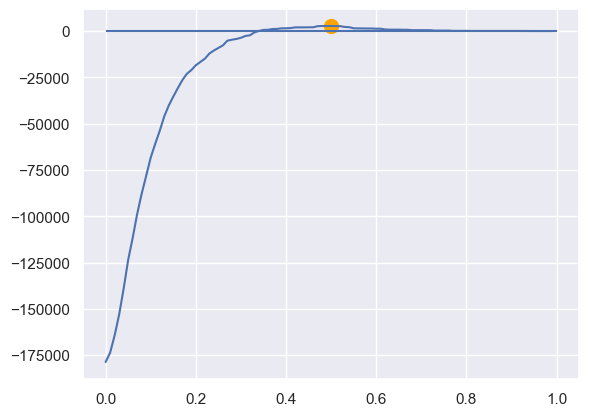

Maximum benefit at cutoff 0.5 with revenue delta of $2,750.02


In [96]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

**Optional extra: how to select the cut-off?**
Above, we decided who to offer the discount to based on a probability cut-off. Is this the optimal strategy?

* For instance, we might be offering discounts to customers who are not very profitable, thus worsening our overall margins substantially. For example, if offering a discount makes the customer unprofitable on a net margin basis then we might want to let them churn rather than save them.

* Even if we only consider revenue, this strategy might not be optimal from a revenue viewpoint. For instance, we can calculate the expected revenue impact of our strategy and prioritise customers for discounts that have a high expected revenue impact. (This means that the probability of churn might be high but they also might be valuable customers).

A general principle here is that we can afford to spend more on retaining high-value customers because the costs of losing them are higher. A very common mistake in business applications of churn is to focus on the churn probability whilst forgetting the value impact (to greater or lesser extents). We have seen many cases where our clients spend as much effort on retaining unprofitable customers as they do on retaining highly profitable customers.

In [97]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),
    'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

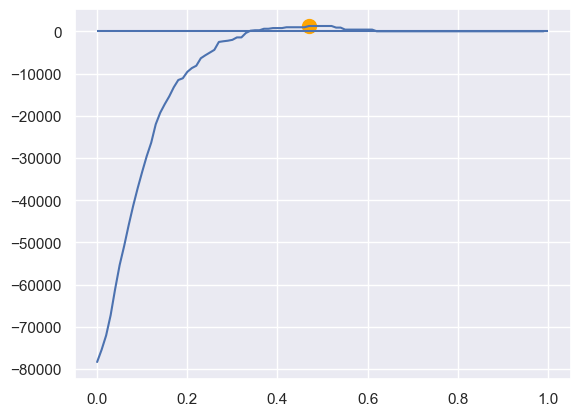

Maximum benefit at cutoff 0.47000000000000003 with revenue delta of $1,250.52


In [98]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

**Note:**
* In this case, it doesn't make sense to prioritize large-revenue customers, since the overall revenue delta is much lower than when targeting everyone. However, this is only the case here since the intervention doesn't depend on the number of customers (simply adjusting prices). The interventions usually go beyond simply adjusting prices to prevent churn.

* There may be the option of intensifying the customer relation, adding key account managers, or other interventions that do incur costs depending on how many customers are targeted. In that case, it may be benefitial to target only a subset of customers to save on these costs, even if the delta in the figure above is reduced.

### Optional extra: Using forecast rather than actual churn
* We may have noticed above that we used actual churn outcomes in calculating the financial impact. Actual churn outcomes are fine if we know them and are conducting a retrospective analysis of the effectiveness of a strategy. This example of analysis is commonly known as "backtesting", ie seeing how well a strategy would have performed historically.

* Of course, one must be careful that any analysis is done using out-of-sample data. Conducting the analysis on the training data will lead to predictions that are too optimistic.

* In practice, actual outcomes may not be available because they are in the future. An alternative is to optimise predicted/forecast revenue based on the probabilities which are an output from our churn model. In this case, we would replace the actual churn outcomes (churn) with the predicted probability of churn from our model. The results here are obviously model-dependent.

* If our model probabilities are poorly calibrated then we can end up with quite poor results from this. Going down this path therefore usually requires the extra step of checking how well calibrated the model probabilities are, and potentially correcting for any miscalibration using Platt scaling, sigmoid calibration or isotonic regression.

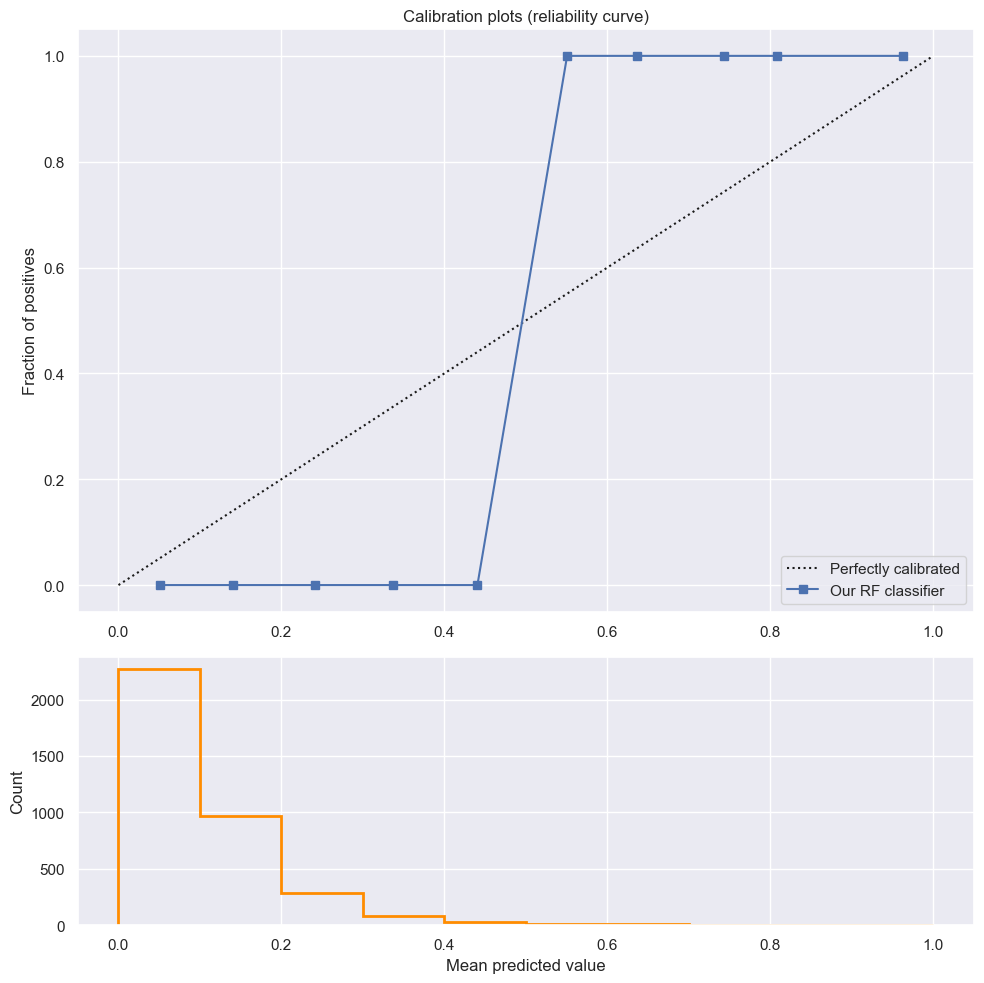

In [99]:
# Check our calibration

from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_data['churn'],
    y_prob=test_data['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_data['churn_probability'], range=(0, 1), bins=10, color='darkorange', histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

**This chart tells us a few things:**
* The top calibration curve exhibits a sigmoid curve, which is typical for an under-confident classifier.
* The bottom chart shows us that the model is postively skewed toward predicting a probability, perhaps due to having such low confidence.

In [100]:
# Electricity evenue for each customer consists of energy consumption (amount * price) and the meter rent
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more d
# Note that we need to reverse the log10-transformation from the data cleaning step

test_data['basecase_revenue'] = np.power(10, test_data['forecast_cons_12m']) * test_data['forecast_price_energy_off_peak'] + test_data['forecast_meter_rent_12m']

In [101]:
# Taking churn into account

test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn_probability'])

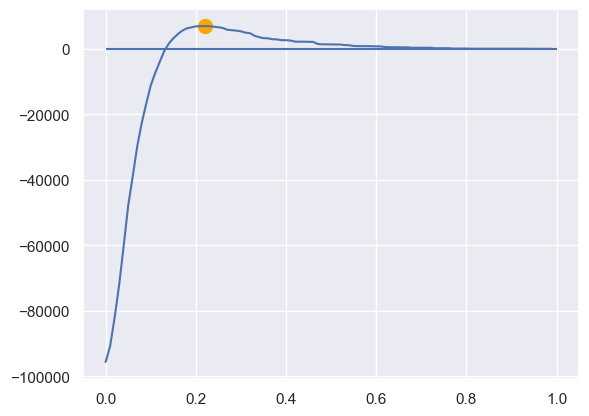

Maximum benefit at cutoff 0.22 with revenue delta of $6,994.43


In [102]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas

rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)